# Import Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ifteshanajnin/carinsuranceclaimprediction-classification")

print("Path to dataset files:", path)

100%|██████████| 1.96M/1.96M [00:00<00:00, 3.28MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ifteshanajnin/carinsuranceclaimprediction-classification/versions/2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv(path + "/train.csv")

In [ ]:
df_test = pd.read_csv(path + "/test.csv")

# EDA

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
df_train["model"].value_counts()

,count
model,
M1,14948
M4,14018
M6,13776
M8,4173
M7,2940
M3,2373
M9,2114
M5,1598
M10,1209


In [ ]:
df_test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [ ]:
df_train.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [ ]:
df_test.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

In [ ]:
df_train.shape

(58592, 44)

In [ ]:
df_test.shape

(39063, 43)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [ ]:
df_train.isnull().sum()

,0
policy_id,0
policy_tenure,0
age_of_car,0
age_of_policyholder,0
area_cluster,0
population_density,0
make,0
segment,0
model,0
fuel_type,0


In [ ]:
df_test.isnull().sum()

,0
policy_id,0
policy_tenure,0
age_of_car,0
age_of_policyholder,0
area_cluster,0
population_density,0
make,0
segment,0
model,0
fuel_type,0


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_test.duplicated().sum()

np.int64(0)

In [ ]:
df_train.nunique()

,0
policy_id,58592
policy_tenure,58592
age_of_car,49
age_of_policyholder,75
area_cluster,22
population_density,22
make,5
segment,6
model,11
fuel_type,3


In [ ]:
df_test.nunique()

,0
policy_id,39063
policy_tenure,39063
age_of_car,51
age_of_policyholder,72
area_cluster,22
population_density,22
make,5
segment,6
model,11
fuel_type,3


In [ ]:
train_uniques = df_train.nunique()
test_uniques = df_test.nunique()

compare = pd.DataFrame({
    "train_unique": train_uniques,
    "test_unique": test_uniques
})
print(compare)

                                  train_unique  test_unique
age_of_car                                  49         51.0
age_of_policyholder                         75         72.0
airbags                                      3          3.0
area_cluster                                22         22.0
cylinder                                     2          2.0
displacement                                 9          9.0
engine_type                                 11         11.0
fuel_type                                    3          3.0
gear_box                                     2          2.0
gross_weight                                10         10.0
height                                      11         11.0
is_adjustable_steering                       2          2.0
is_brake_assist                              2          2.0
is_central_locking                           2          2.0
is_claim                                     2          NaN
is_day_night_rear_view_mirror           

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,39063.0,0.611304,0.415005,0.002745,0.208958,0.574078,1.040936,1.391398
age_of_car,39063.0,0.069635,0.056854,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,39063.0,0.469087,0.122072,0.288462,0.375000,0.451923,0.548077,0.990385
population_density,39063.0,18816.232496,17651.942351,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,39063.0,1.763382,1.134112,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,39063.0,3.139672,1.831043,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,39063.0,1160.605842,266.942754,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,39063.0,3.620613,0.485241,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,39063.0,5.245782,0.430556,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,39063.0,4.853222,0.228060,4.500000,4.600000,4.800000,5.000000,5.200000


In [ ]:
df_train['is_claim'].value_counts(normalize=True)

,proportion
is_claim,
0,0.936032
1,0.063968


In [ ]:
for df, name in [(df_train,"Train"),(df_test,"Test")]:
    print(f"\nTop categories in {name}:")
    for col in df.select_dtypes(include='object').columns:
        print(f"\n{col}:\n", df[col].value_counts(normalize=True).head())


Top categories in Train:

policy_id:
 policy_id
ID58576    0.000017
ID58575    0.000017
ID58574    0.000017
ID58573    0.000017
ID58572    0.000017
Name: proportion, dtype: float64

area_cluster:
 area_cluster
C8     0.233035
C2     0.125307
C5     0.119112
C3     0.104127
C14    0.062466
Name: proportion, dtype: float64

segment:
 segment
B2    0.312568
A     0.295621
C2    0.239248
B1    0.071221
C1    0.060708
Name: proportion, dtype: float64

model:
 model
M1    0.255120
M4    0.239248
M6    0.235117
M8    0.071221
M7    0.050177
Name: proportion, dtype: float64

fuel_type:
 fuel_type
Petrol    0.350423
CNG       0.346976
Diesel    0.302601
Name: proportion, dtype: float64

max_torque:
 max_torque
113Nm@4400rpm     0.303727
60Nm@3500rpm      0.255120
250Nm@2750rpm     0.239248
82.1Nm@3400rpm    0.071221
91Nm@4250rpm      0.040500
Name: proportion, dtype: float64

max_power:
 max_power
88.50bhp@6000rpm     0.303727
40.36bhp@6000rpm     0.255120
113.45bhp@4000rpm    0.239248
55.92bh

drop policy_id / show all unique IDs should drop this column before training

In [ ]:
train_clean = df_train.copy()
test_clean = df_test.copy()

In [ ]:
train_clean = train_clean.drop(columns=['policy_id'])
test_clean = test_clean.drop(columns=['policy_id'])

# EDA (Descriptive Statistics)

In [ ]:
stats = pd.DataFrame()
numeric_cols = df_train.select_dtypes(include='number').columns

stats['Mean'] = df_train[numeric_cols].mean()
stats['Median'] = df_train[numeric_cols].median()
stats['Mode'] = df_train[numeric_cols].mode().iloc[0]
stats['Std Dev'] = df_train[numeric_cols].std()
stats['Variance'] = df_train[numeric_cols].var()
stats['Min'] = df_train[numeric_cols].min()
stats['Max'] = df_train[numeric_cols].max()
stats['Range'] = stats['Max'] - stats['Min']
stats['Q1'] = df_train[numeric_cols].quantile(0.25)
stats['Q3'] = df_train[numeric_cols].quantile(0.75)
stats['IQR'] = stats['Q3'] - stats['Q1']
stats['Skewness'] = df_train[numeric_cols].skew()
stats['Kurtosis'] = df_train[numeric_cols].kurtosis()
stats['Lower Bound'] = stats['Q1'] - 1.5 * stats['IQR']
stats['Upper Bound'] = stats['Q3'] + 1.5 * stats['IQR']

outlier_counts = {}
for col in numeric_cols:
    lower = stats.loc[col, 'Lower Bound']
    upper = stats.loc[col, 'Upper Bound']
    outliers = df_train[(df_train[col] < lower) | (df_train[col] > upper)][col]
    outlier_counts[col] = len(outliers)

stats['Outlier Count'] = pd.Series(outlier_counts)

stats

,Mean,Median,Mode,Std Dev,Variance,Min,Max,Range,Q1,Q3,IQR,Skewness,Kurtosis,Lower Bound,Upper Bound,Outlier Count
policy_tenure,0.611246,0.573792,0.002735,0.414156,1.715256e-01,0.002735,1.396641,1.393906,0.210250,1.039104,0.828855,0.053588,-1.498350,-1.033032,2.282386,0
age_of_car,0.069424,0.060000,0.010000,0.056721,3.217232e-03,0.000000,1.000000,1.000000,0.020000,0.110000,0.090000,1.094081,5.301345,-0.115000,0.245000,269
age_of_policyholder,0.469420,0.451923,0.375000,0.122886,1.510094e-02,0.288462,1.000000,0.711538,0.365385,0.548077,0.182692,0.640049,-0.156782,0.091346,0.822115,221
population_density,18826.858667,8794.000000,8794.000000,17660.174792,3.118818e+08,290.000000,73430.000000,73140.000000,6112.000000,27003.000000,20891.000000,1.674178,2.588797,-25224.500000,58339.500000,3647
make,1.763722,1.000000,1.000000,1.136988,1.292741e+00,1.000000,5.000000,4.000000,1.000000,3.000000,2.000000,1.197457,0.336315,-2.000000,6.000000,0
airbags,3.137066,2.000000,2.000000,1.832641,3.358574e+00,1.000000,6.000000,5.000000,2.000000,6.000000,4.000000,0.905946,-1.135791,-4.000000,12.000000,0
displacement,1162.355851,1197.000000,1197.000000,266.304786,7.091824e+04,796.000000,1498.000000,702.000000,796.000000,1493.000000,697.000000,-0.105317,-1.342401,-249.500000,2538.500000,0
cylinder,3.626963,4.000000,4.000000,0.483616,2.338845e-01,3.000000,4.000000,1.000000,3.000000,4.000000,1.000000,-0.525074,-1.724356,1.500000,5.500000,0
gear_box,5.245443,5.000000,5.000000,0.430353,1.852039e-01,5.000000,6.000000,1.000000,5.000000,5.000000,0.000000,1.183054,-0.600403,5.000000,5.000000,14381
turning_radius,4.852893,4.800000,4.600000,0.228061,5.201174e-02,4.500000,5.200000,0.700000,4.600000,5.000000,0.400000,0.420983,-1.176646,4.000000,5.600000,0


# EDA on Train (with target)


Train - is_claim distribution:
is_claim
0    0.936032
1    0.063968
Name: proportion, dtype: float64


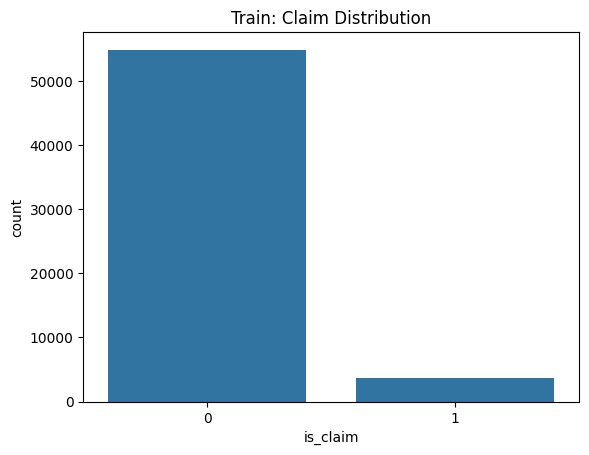

In [ ]:
if "is_claim" in train_clean.columns:
    print("\nTrain - is_claim distribution:")
    print(train_clean['is_claim'].value_counts(normalize=True))

    sns.countplot(x="is_claim", data=train_clean)
    plt.title("Train: Claim Distribution")
    plt.show()

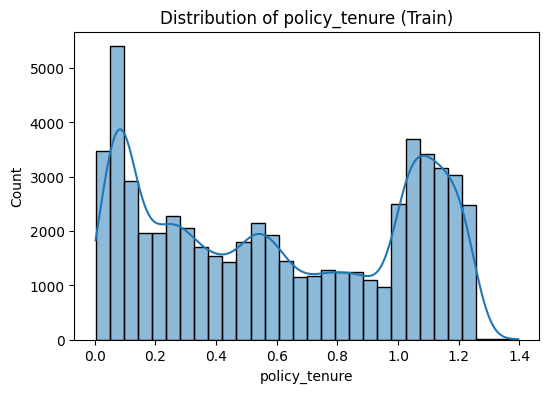

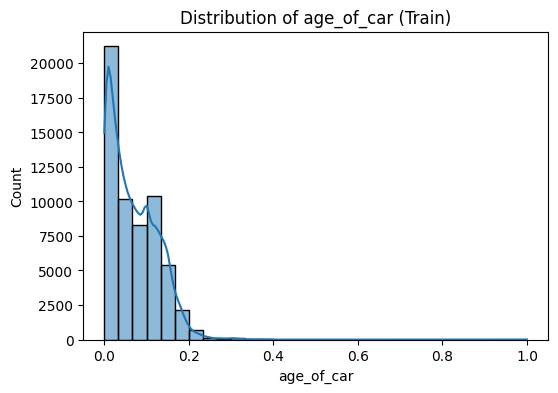

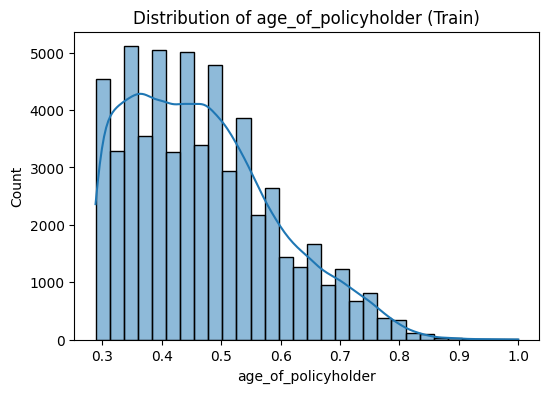

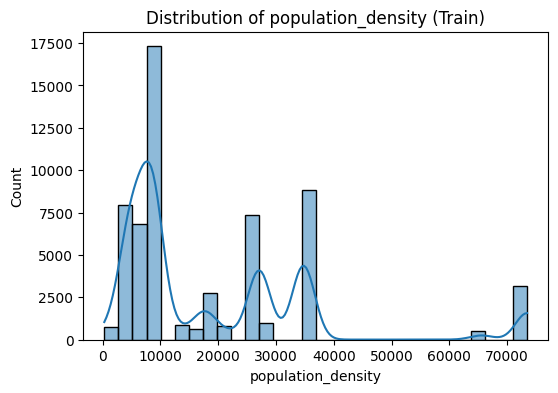

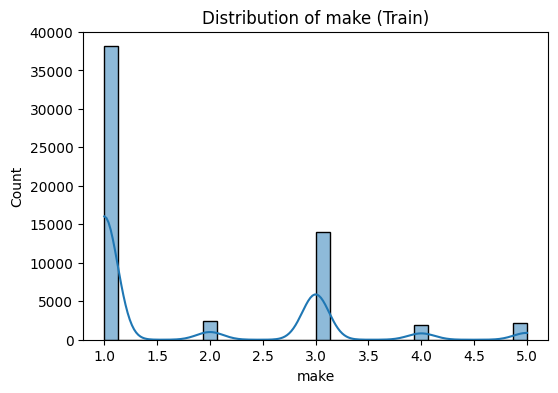

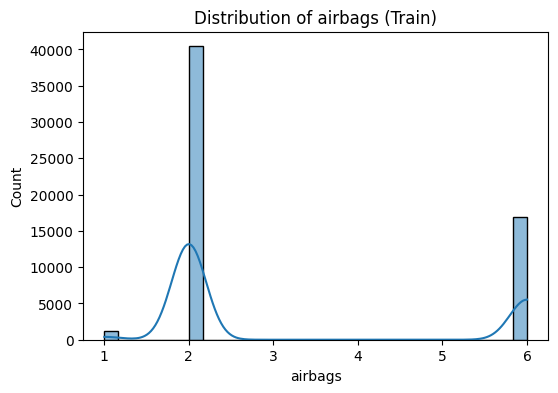

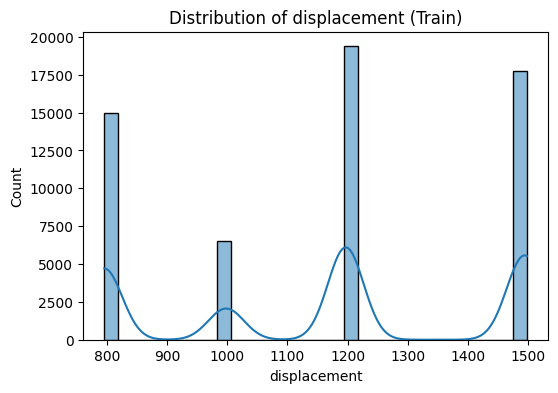

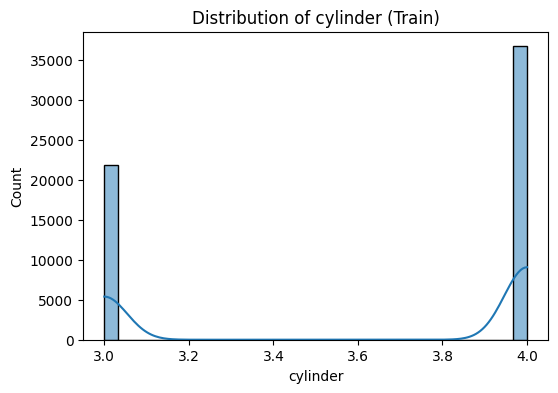

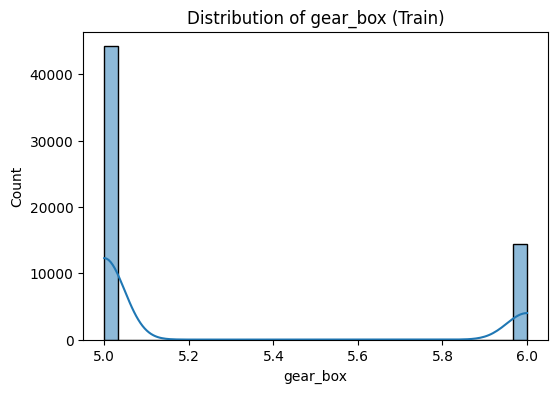

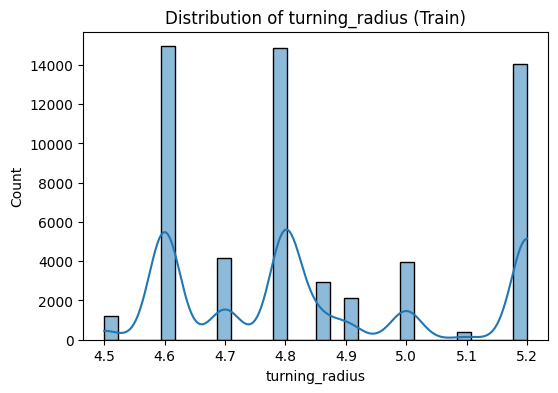

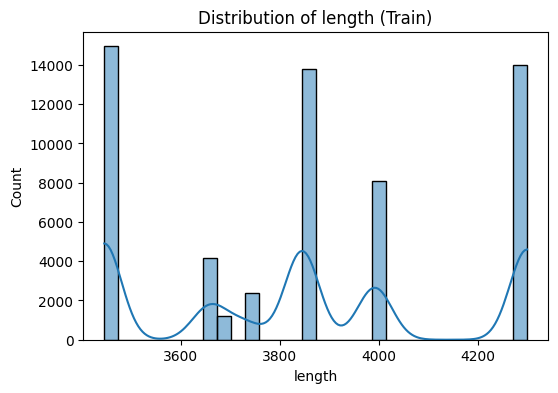

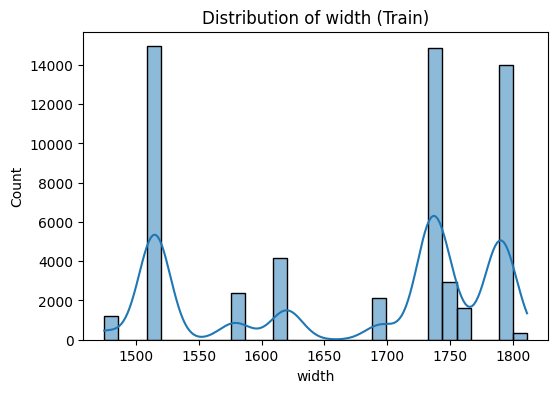

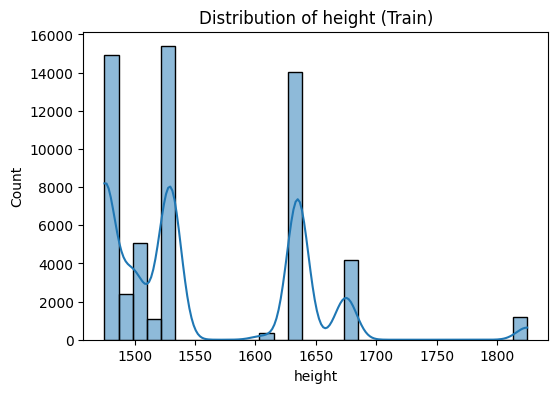

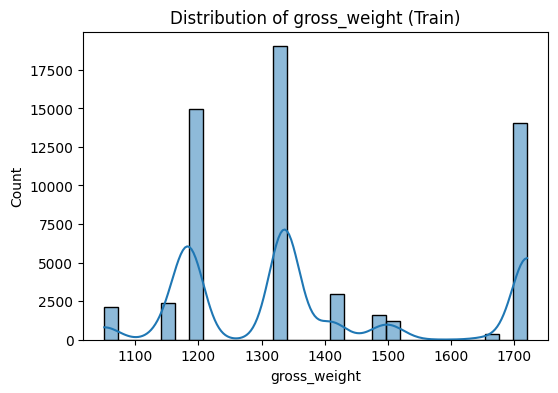

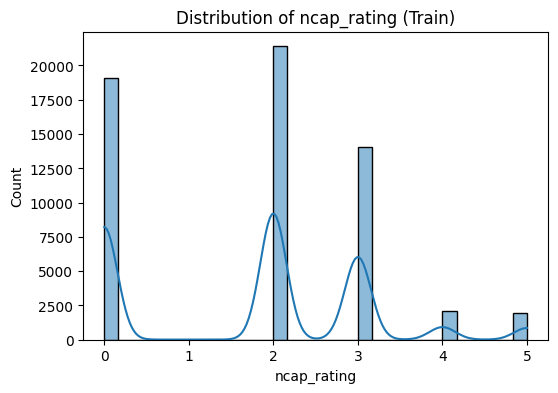

In [ ]:
num_cols = train_clean.select_dtypes(include=['int64','float64']).columns.drop("is_claim")

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (Train)")
    plt.show()

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


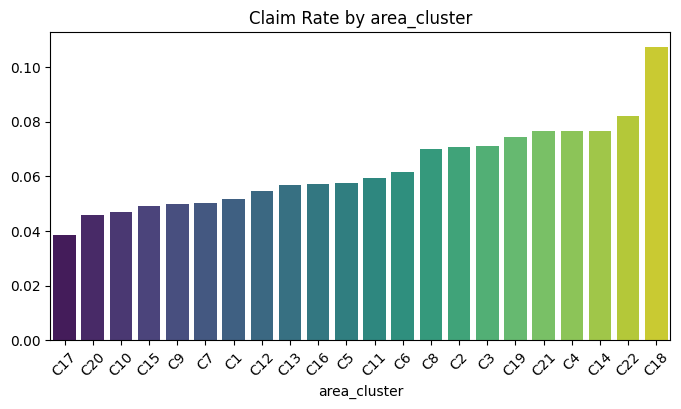

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


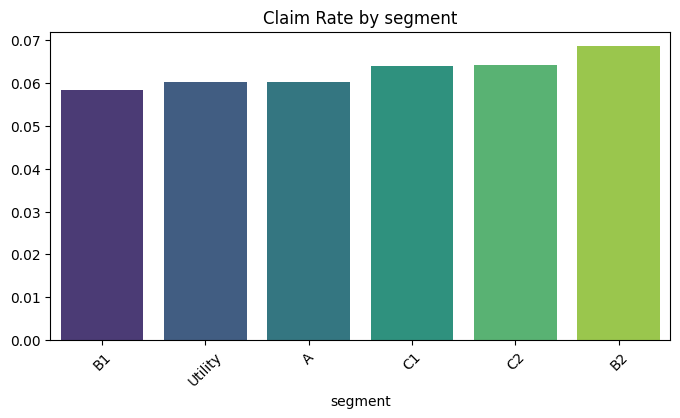

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


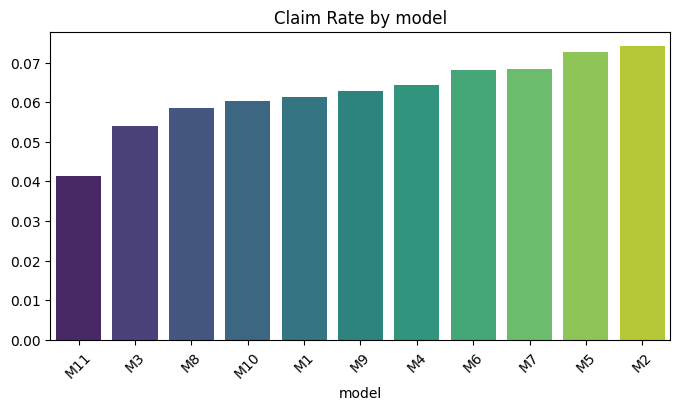

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


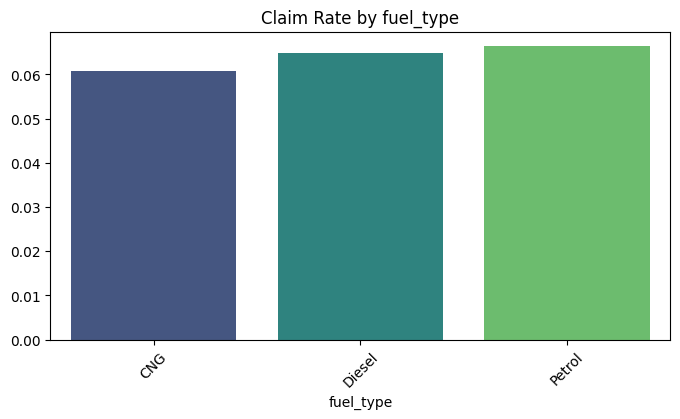

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


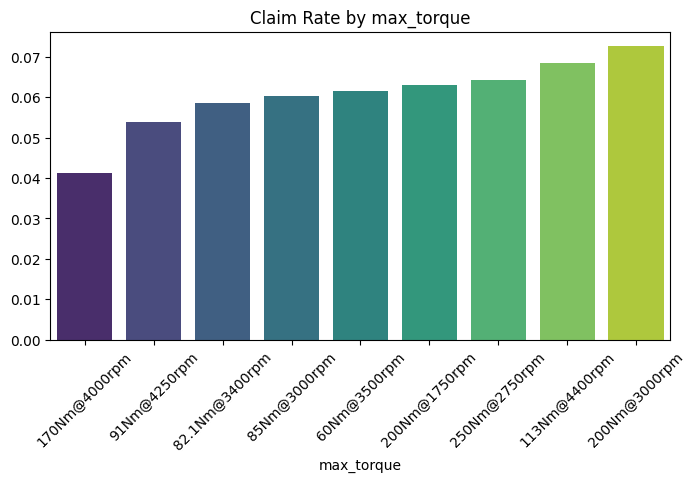

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


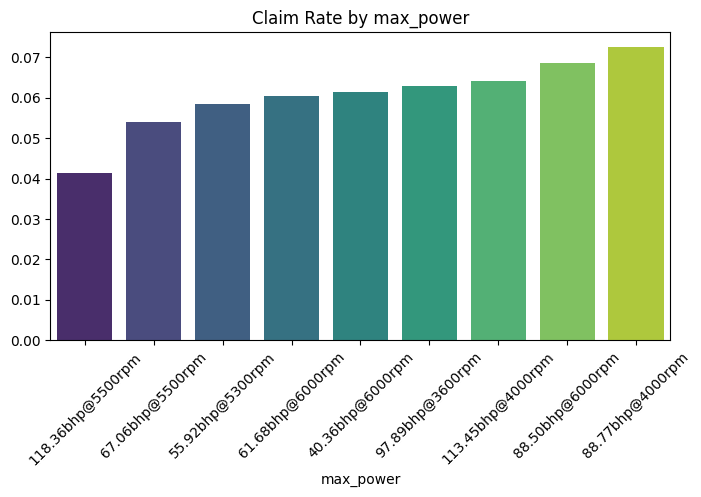

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


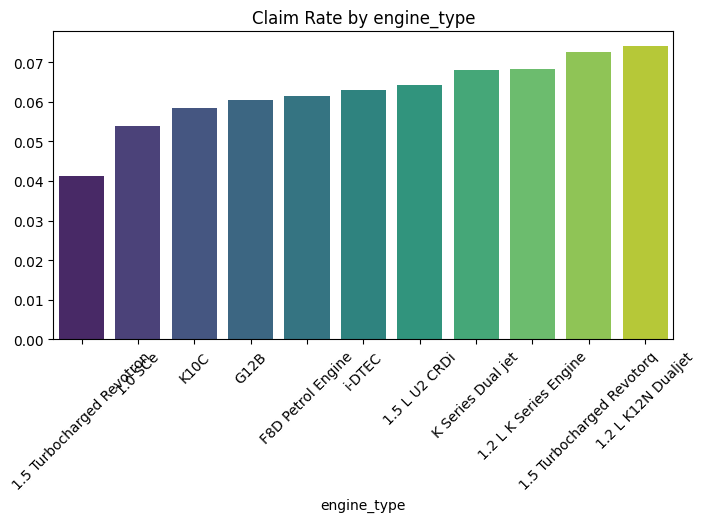

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


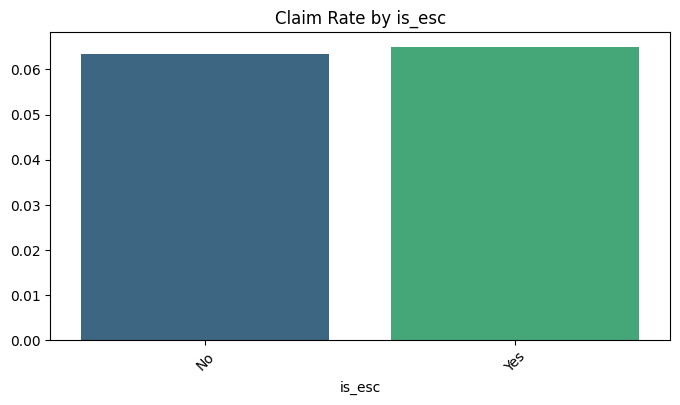

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


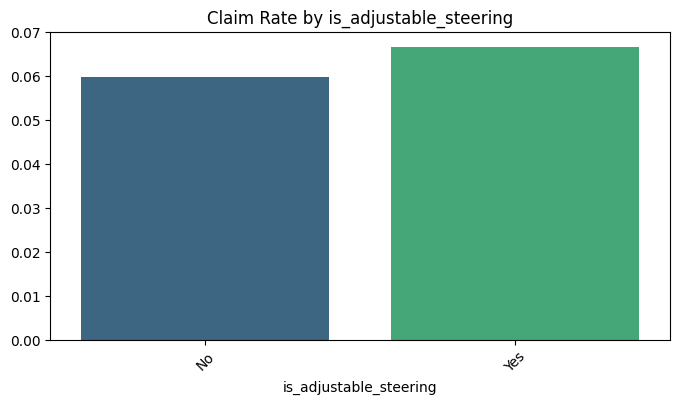

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


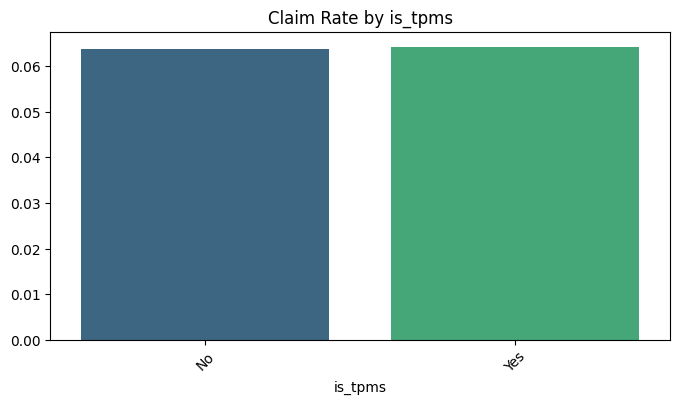

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


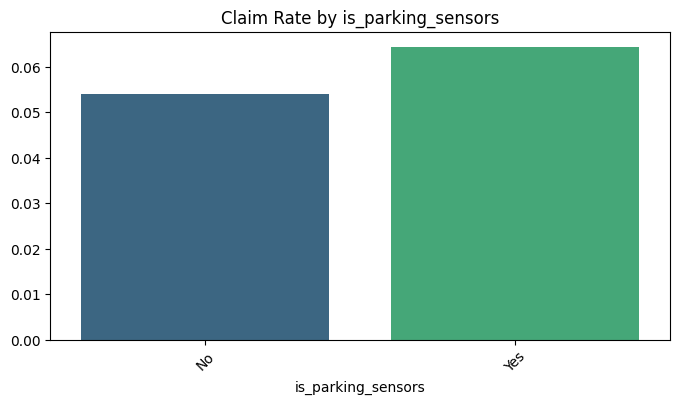

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


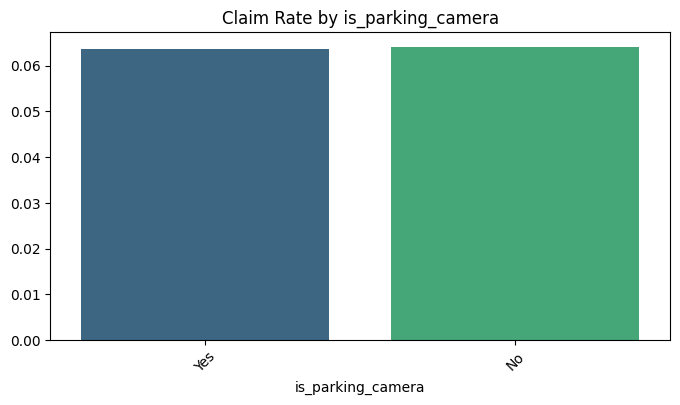

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


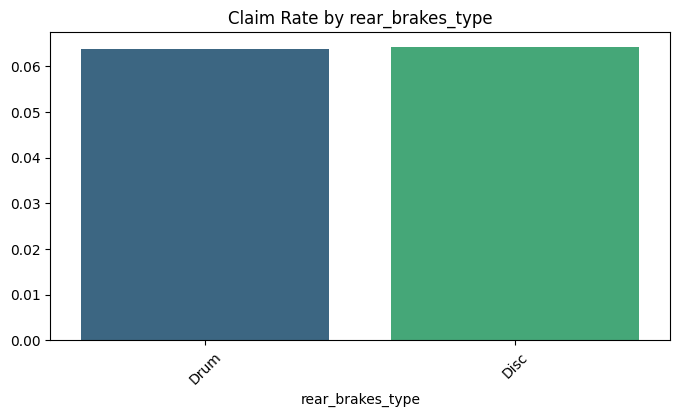

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


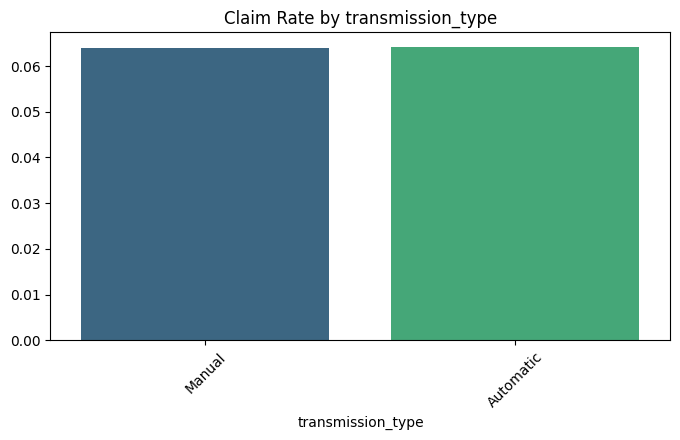

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


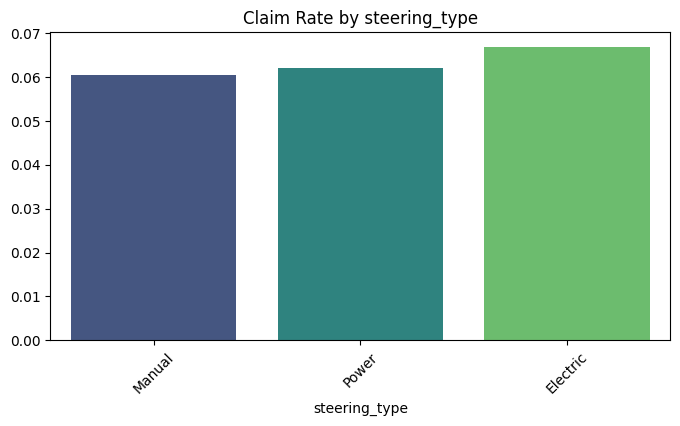

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


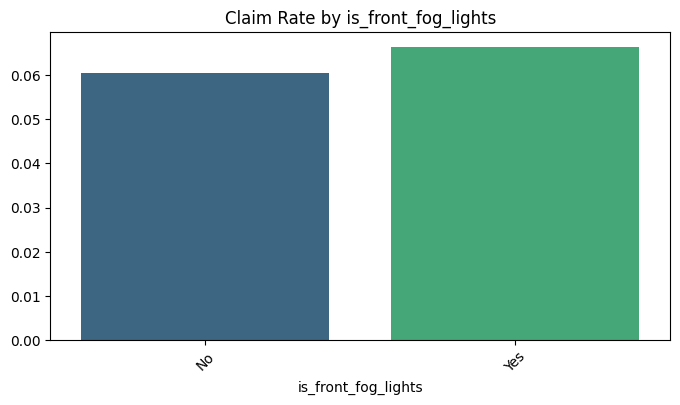

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


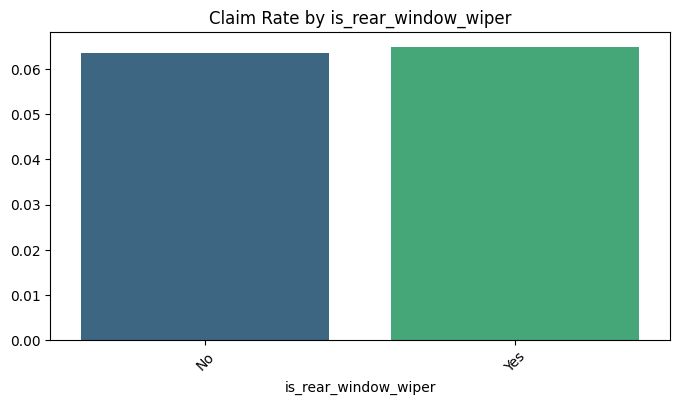

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


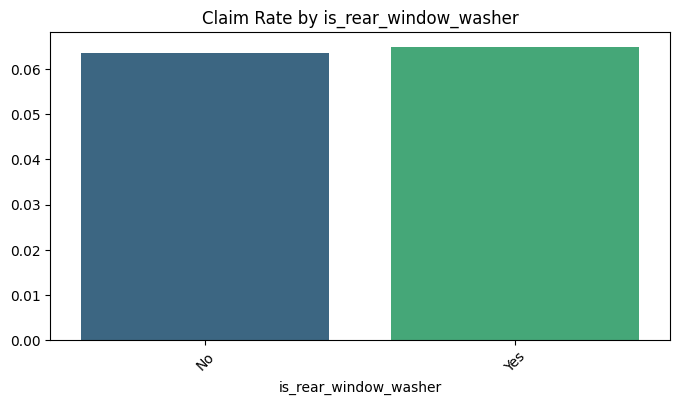

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


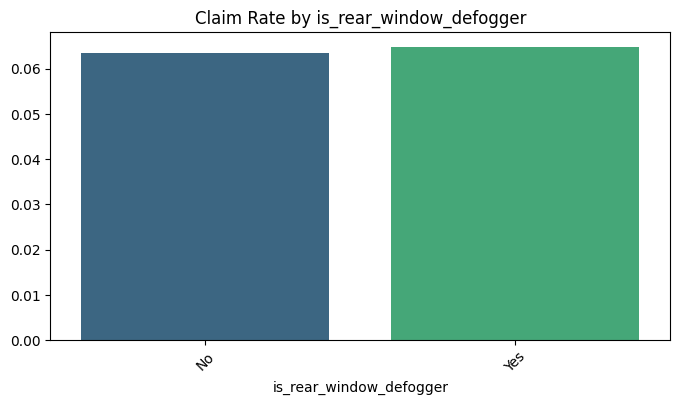

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


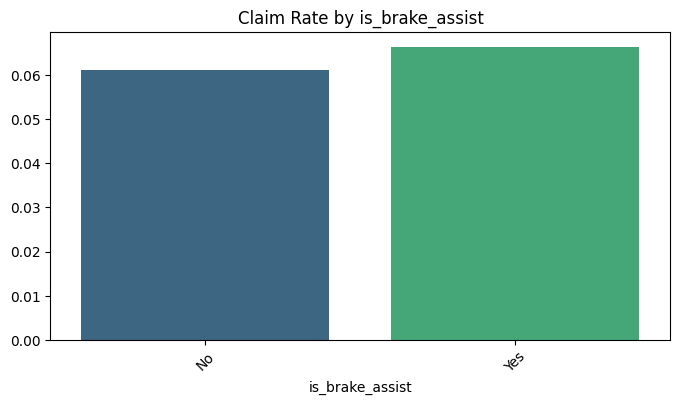

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


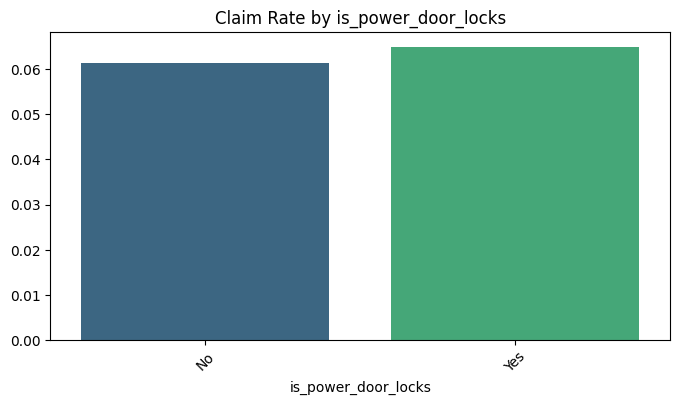

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


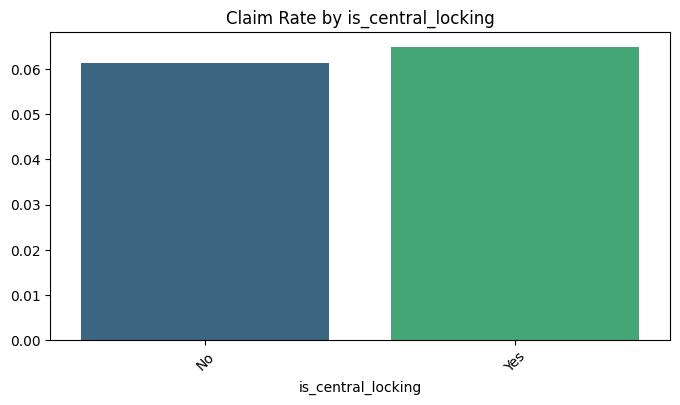

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


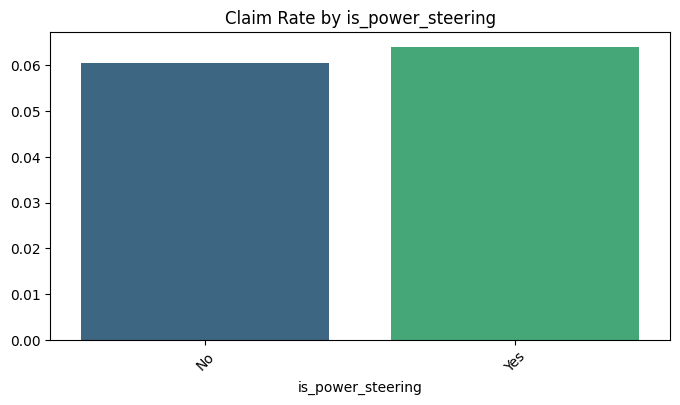

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


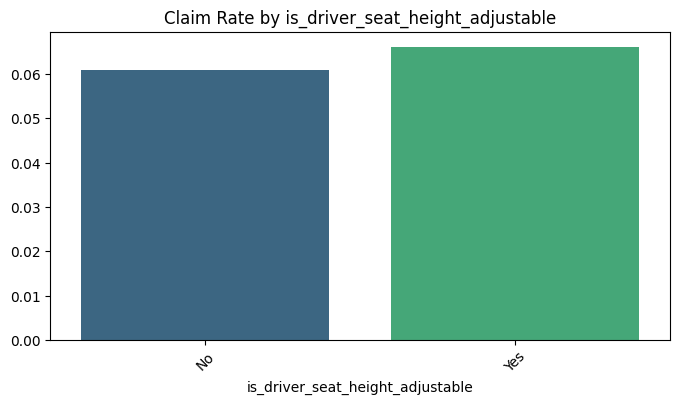

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


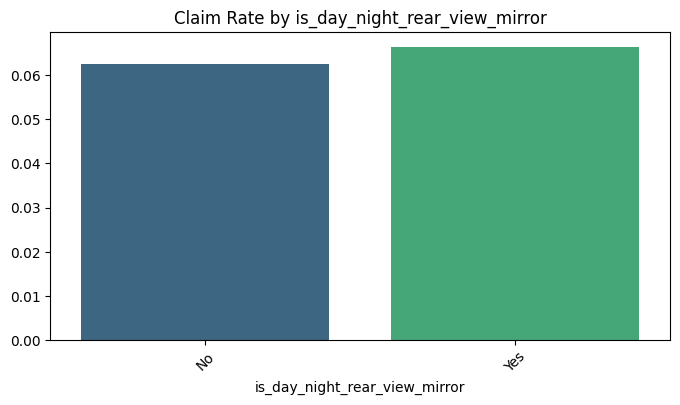

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


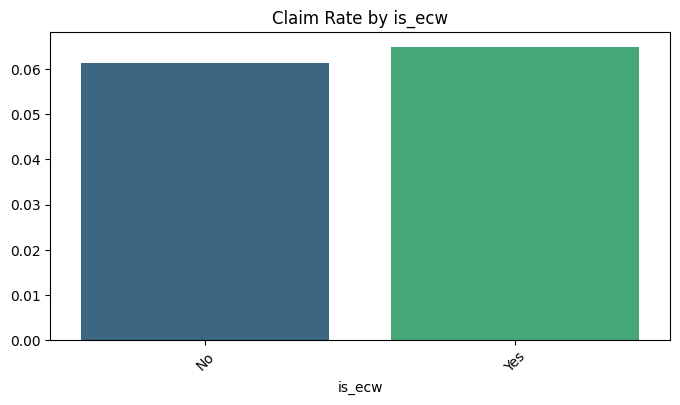

/tmp/ipython-input-306547457.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")


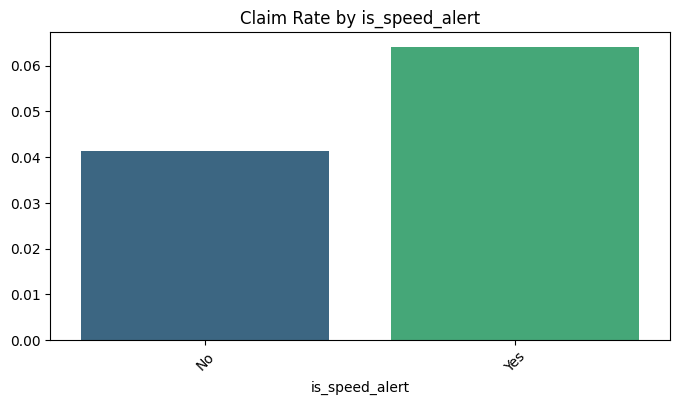

In [ ]:
cat_cols = train_clean.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    claim_rate = train_clean.groupby(col)['is_claim'].mean().sort_values()
    sns.barplot(x=claim_rate.index, y=claim_rate.values, palette="viridis")
    plt.title(f"Claim Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()

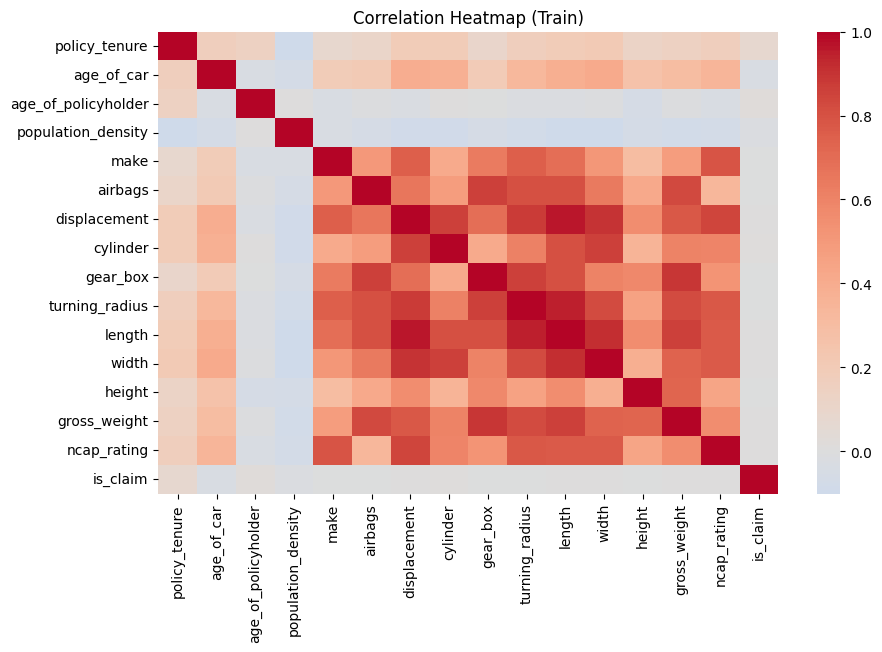

In [ ]:
plt.figure(figsize=(10,6))
corr = train_clean.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Train)")
plt.show()

# EDA on Test (sanity check)

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


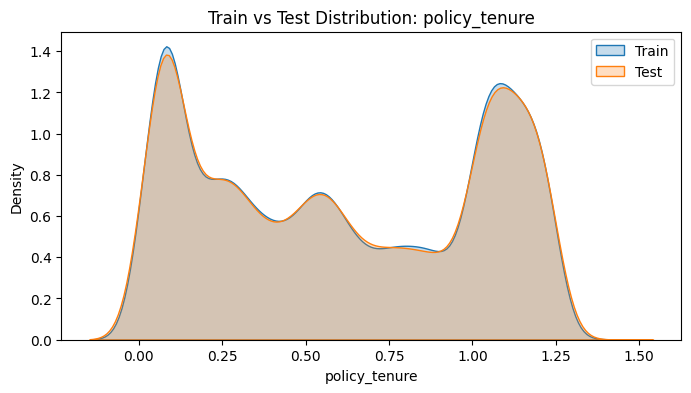

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


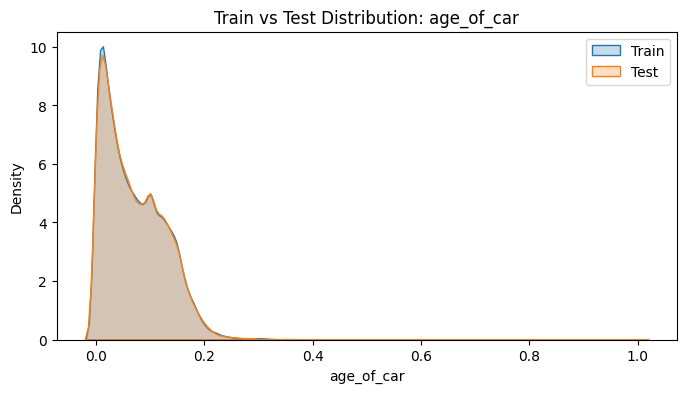

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


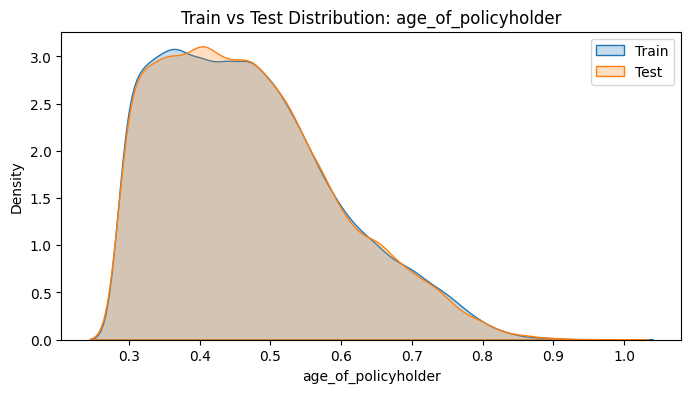

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


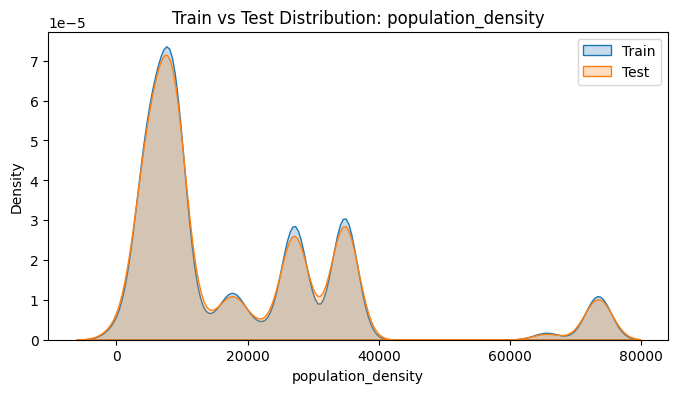

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


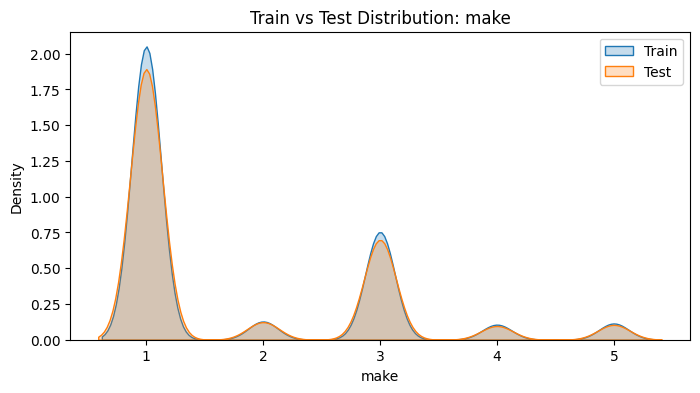

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


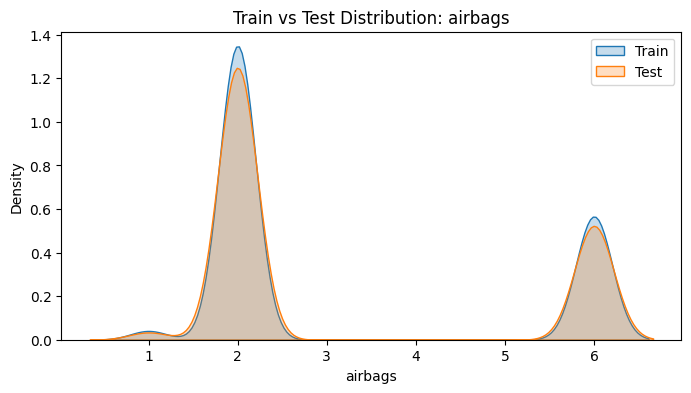

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


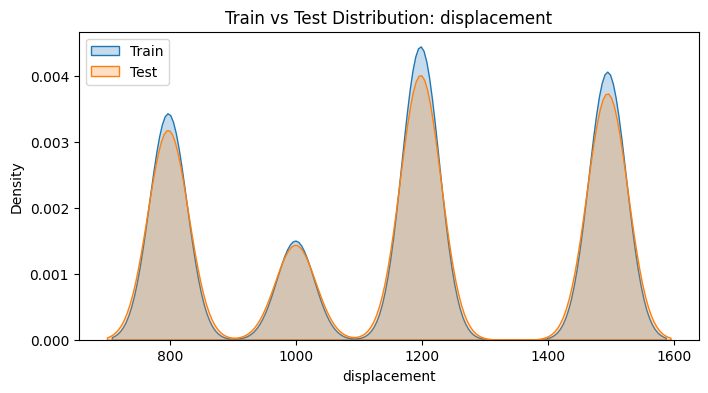

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


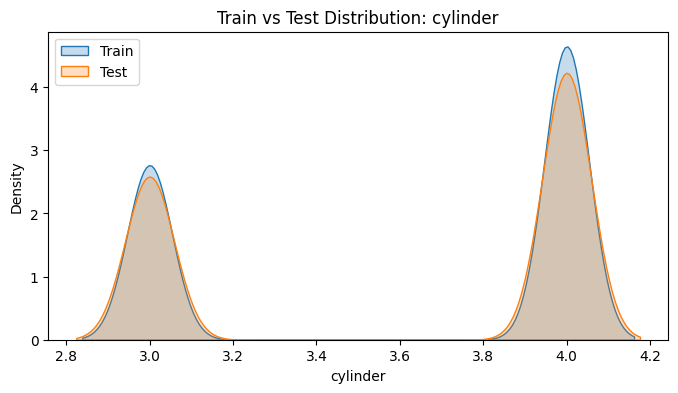

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


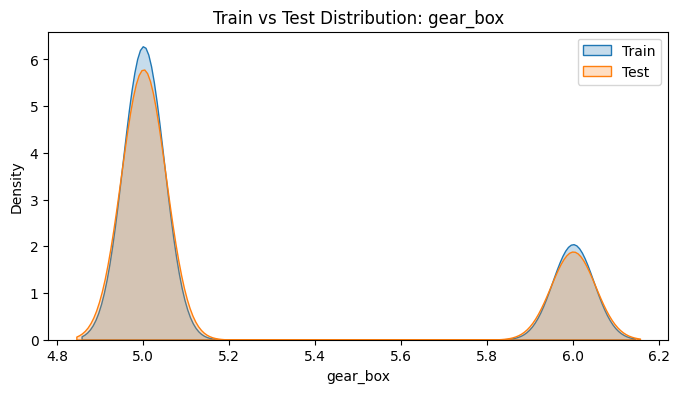

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


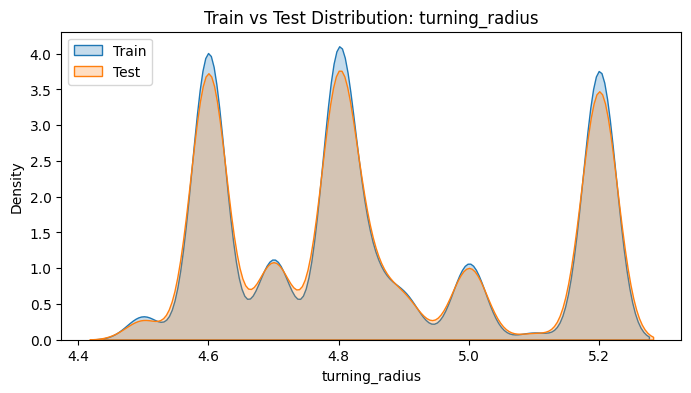

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


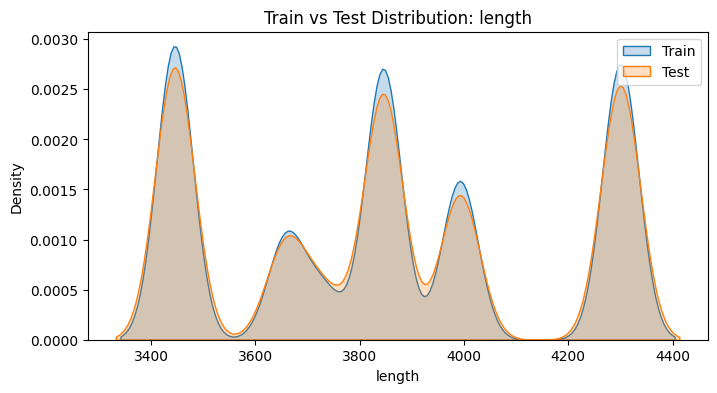

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


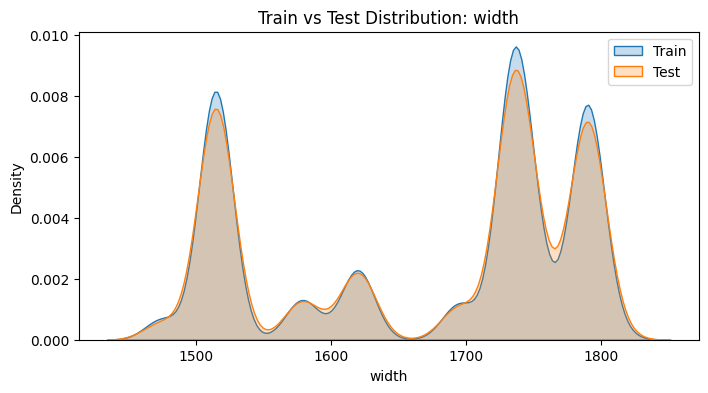

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


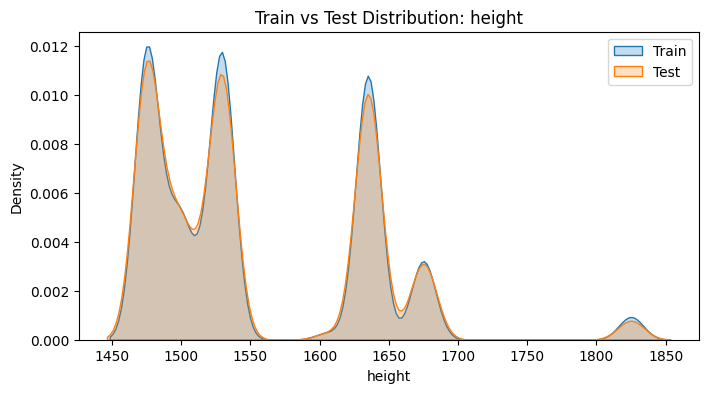

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


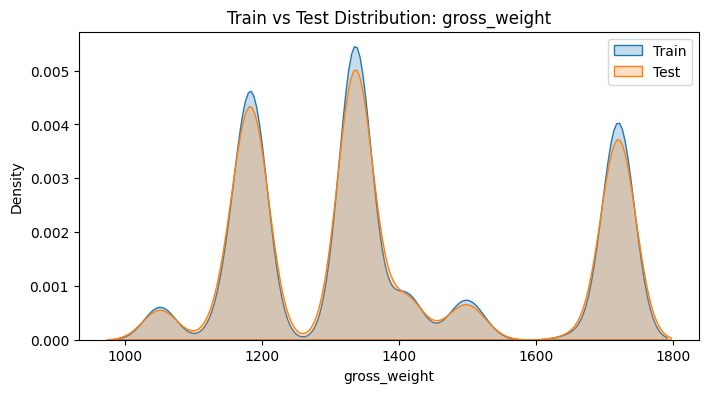

/tmp/ipython-input-1905513289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_clean[col], label="Train", shade=True)
/tmp/ipython-input-1905513289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_clean[col], label="Test", shade=True)


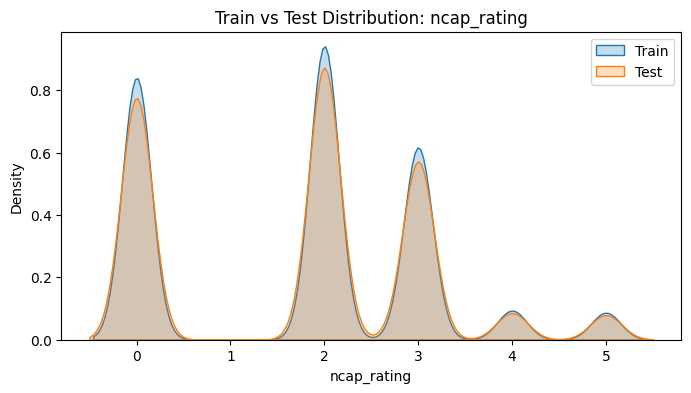

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(train_clean[col], label="Train", shade=True)
    sns.kdeplot(test_clean[col], label="Test", shade=True)
    plt.title(f"Train vs Test Distribution: {col}")
    plt.legend()
    plt.show()

In [ ]:
compare_uniques = pd.DataFrame({
    "train_unique": train_clean.nunique(),
    "test_unique": test_clean.nunique()
})
print("\nUnique Value Comparison (Train vs Test):")
print(compare_uniques)


Unique Value Comparison (Train vs Test):
                                  train_unique  test_unique
age_of_car                                  49         51.0
age_of_policyholder                         75         72.0
airbags                                      3          3.0
area_cluster                                22         22.0
cylinder                                     2          2.0
displacement                                 9          9.0
engine_type                                 11         11.0
fuel_type                                    3          3.0
gear_box                                     2          2.0
gross_weight                                10         10.0
height                                      11         11.0
is_adjustable_steering                       2          2.0
is_brake_assist                              2          2.0
is_central_locking                           2          2.0
is_claim                                     2          Na

In [ ]:
for col in train_clean.select_dtypes(include='object').columns:
    train_cats = set(df_train[col].unique())
    test_cats = set(df_test[col].unique())

    only_in_train = train_cats - test_cats
    only_in_test = test_cats - train_cats

    if only_in_train:
        print(f"{col}: categories only in Train: {only_in_train}")
    if only_in_test:
        print(f"{col}: categories only in Test: {only_in_test}")

In [ ]:
train_clean["is_claim"].value_counts()

,count
is_claim,
0,54844
1,3748


In [ ]:
train_clean.shape

(58592, 43)

# Data Preprocessing

In [ ]:
train_clean.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
train_clean.shape

(58592, 43)

In [ ]:
stats.head(20)

,Mean,Median,Mode,Std Dev,Variance,Min,Max,Range,Q1,Q3,IQR,Skewness,Kurtosis,Lower Bound,Upper Bound,Outlier Count
policy_tenure,0.611246,0.573792,0.002735,0.414156,1.715256e-01,0.002735,1.396641,1.393906,0.210250,1.039104,0.828855,0.053588,-1.498350,-1.033032,2.282386,0
age_of_car,0.069424,0.060000,0.010000,0.056721,3.217232e-03,0.000000,1.000000,1.000000,0.020000,0.110000,0.090000,1.094081,5.301345,-0.115000,0.245000,269
age_of_policyholder,0.469420,0.451923,0.375000,0.122886,1.510094e-02,0.288462,1.000000,0.711538,0.365385,0.548077,0.182692,0.640049,-0.156782,0.091346,0.822115,221
population_density,18826.858667,8794.000000,8794.000000,17660.174792,3.118818e+08,290.000000,73430.000000,73140.000000,6112.000000,27003.000000,20891.000000,1.674178,2.588797,-25224.500000,58339.500000,3647
make,1.763722,1.000000,1.000000,1.136988,1.292741e+00,1.000000,5.000000,4.000000,1.000000,3.000000,2.000000,1.197457,0.336315,-2.000000,6.000000,0
airbags,3.137066,2.000000,2.000000,1.832641,3.358574e+00,1.000000,6.000000,5.000000,2.000000,6.000000,4.000000,0.905946,-1.135791,-4.000000,12.000000,0
displacement,1162.355851,1197.000000,1197.000000,266.304786,7.091824e+04,796.000000,1498.000000,702.000000,796.000000,1493.000000,697.000000,-0.105317,-1.342401,-249.500000,2538.500000,0
cylinder,3.626963,4.000000,4.000000,0.483616,2.338845e-01,3.000000,4.000000,1.000000,3.000000,4.000000,1.000000,-0.525074,-1.724356,1.500000,5.500000,0
gear_box,5.245443,5.000000,5.000000,0.430353,1.852039e-01,5.000000,6.000000,1.000000,5.000000,5.000000,0.000000,1.183054,-0.600403,5.000000,5.000000,14381
turning_radius,4.852893,4.800000,4.600000,0.228061,5.201174e-02,4.500000,5.200000,0.700000,4.600000,5.000000,0.400000,0.420983,-1.176646,4.000000,5.600000,0


In [ ]:
train_clean.dtypes

,0
policy_tenure,float64
age_of_car,float64
age_of_policyholder,float64
area_cluster,object
population_density,int64
make,int64
segment,object
model,object
fuel_type,object
max_torque,object


In [ ]:
# รายชื่อคอลัมน์ที่เป็น Boolean-like ที่ต้องแปลง
bool_columns = [

    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
    'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
    'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
    'is_ecw', 'is_speed_alert'

]

# แปลงค่า 'Yes' เป็น 1 และ 'No' เป็น 0 ในแต่ละคอลัมน์
for col in bool_columns:
    train_clean[col] = train_clean[col].map({'Yes': 1, 'No': 0})

In [ ]:
# แยกค่าจากคอลัมน์ 'max_torque'
# ตัวอย่างข้อมูล: '60Nm@3500rpm'
train_clean[['Torque', 'Torque_unit_rpm']] = train_clean['max_torque'].str.split('@', expand=True)
train_clean['Torque_unit'] = train_clean['Torque'].str.extract('([a-zA-Z]+)')
train_clean['Torque'] = train_clean['Torque'].str.extract('([0-9.]+)')
train_clean['Torque_rpm'] = train_clean['Torque_unit_rpm'].str.extract('([0-9.]+)')

# แปลงคอลัมน์ใหม่ให้เป็นตัวเลข
train_clean['Torque'] = pd.to_numeric(train_clean['Torque'])
train_clean['Torque_rpm'] = pd.to_numeric(train_clean['Torque_rpm'])

# แยกค่าจากคอลัมน์ 'max_power'
# ตัวอย่างข้อมูล: '40.36bhp@6000rpm'
train_clean[['Power', 'Power_unit_rpm']] = train_clean['max_power'].str.split('@', expand=True)
train_clean['Power_unit'] = train_clean['Power'].str.extract('([a-zA-Z]+)')
train_clean['Power'] = train_clean['Power'].str.extract('([0-9.]+)')
train_clean['Power_rpm'] = train_clean['Power_unit_rpm'].str.extract('([0-9.]+)')

# แปลงคอลัมน์ใหม่ให้เป็นตัวเลข
train_clean['Power'] = pd.to_numeric(train_clean['Power'])
train_clean['Power_rpm'] = pd.to_numeric(train_clean['Power_rpm'])

# ลบคอลัมน์เดิมที่ไม่จำเป็นออก
train_clean = train_clean.drop(columns=['max_torque', 'max_power', 'Torque_unit_rpm', 'Power_unit_rpm'])

In [ ]:
# รายชื่อคอลัมน์ที่เป็น Categorical ที่จะทำ One-Hot Encoding
categorical_columns = [
    'area_cluster', 'segment', 'model', 'fuel_type',
    'engine_type', 'rear_brakes_type', 'transmission_type',
    'steering_type','Torque_unit','Power_unit', 'gear_box'
]

# ทำ One-Hot Encoding
train_clean = pd.get_dummies(train_clean, columns=categorical_columns)

In [ ]:
train_clean.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Torque,Torque_rpm,Power,Power_rpm,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power,Torque_unit_Nm,Power_unit_bhp,gear_box_5,gear_box_6
0,0.515874,0.05,0.644231,4990,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,True,True,False
1,0.672619,0.02,0.375000,27003,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,True,True,False
2,0.841110,0.02,0.384615,4076,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,True,True,True,False
3,0.900277,0.11,0.432692,21622,1,2,1,1,0,1,1,1197,4,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,True,True,False
4,0.596403,0.11,0.634615,34738,2,2,0,0,0,0,1,999,3,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,Fal

In [ ]:
# แปลงค่า True/False ในคอลัมน์ที่ถูกสร้างใหม่ให้เป็น 1/0
for col in train_clean.columns:
    if train_clean[col].dtype == 'bool':
        train_clean[col] = train_clean[col].astype(int)

In [ ]:
train_clean.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Torque,Torque_rpm,Power,Power_rpm,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power,Torque_unit_Nm,Power_unit_bhp,gear_box_5,gear_box_6
0,0.515874,0.05,0.644231,4990,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
1,0.672619,0.02,0.375000,27003,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
2,0.841110,0.02,0.384615,4076,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
3,0.900277,0.11,0.432692,21622,1,2,1,1,0,1,1,1197,4,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0
4,0.596403,0.11,0.634615,34738,2,2,0,0,0,0,1,999,3,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0


In [ ]:
train_clean.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'Torque',
       'Torque_rpm', 'Power', 'Power_rpm', 'area_cluster_C1',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       

In [ ]:
df_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
train_clean.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Torque,Torque_rpm,Power,Power_rpm,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power,Torque_unit_Nm,Power_unit_bhp,gear_box_5,gear_box_6
0,0.515874,0.05,0.644231,4990,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
1,0.672619,0.02,0.375000,27003,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
2,0.841110,0.02,0.384615,4076,1,2,0,0,0,1,0,796,3,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,60.0,3500,40.36,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
3,0.900277,0.11,0.432692,21622,1,2,1,1,0,1,1,1197,4,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,113.0,4400,88.50,6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0
4,0.596403,0.11,0.634615,34738,2,2,0,0,0,0,1,999,3,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,91.0,4250,67.06,5500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0


In [ ]:
train_clean.dtypes

,0
policy_tenure,float64
age_of_car,float64
age_of_policyholder,float64
population_density,int64
make,int64
...,...
steering_type_Power,int64
Torque_unit_Nm,int64
Power_unit_bhp,int64
gear_box_5,int64


In [ ]:
# # The list of columns you want to check for outliers
# outlier_columns = ['age_of_car', 'age_of_policyholder', 'population_density']

# # Create a new DataFrame to avoid changing the original
# train_clean_no_outliers = train_clean.copy()

# # Loop through each column to remove outliers
# for col in outlier_columns:
#     # Use .loc to find the row where the index matches the column name
#     lower_bound = stats.loc[col, 'Lower Bound']
#     upper_bound = stats.loc[col, 'Upper Bound']

#     # Filter the DataFrame
#     train_clean_no_outliers = train_clean_no_outliers[
#         (train_clean_no_outliers[col] >= lower_bound) &
#         (train_clean_no_outliers[col] <= upper_bound)
#     ]

In [ ]:
# The list of columns you want to check for outliers
outlier_columns = ['age_of_car', 'age_of_policyholder', 'population_density']

# Create a new DataFrame to avoid changing the original
train_clean_no_outliers = train_clean.copy()

# Calculate the median for each column *before* addressing outliers
# This assumes 'train_clean' is the original, full dataset
median_values = train_clean[outlier_columns].median()

# Loop through each column to replace outliers with the median
for col in outlier_columns:
    # Get the pre-calculated bounds from the 'stats' DataFrame (e.g., Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    lower_bound = stats.loc[col, 'Lower Bound']
    upper_bound = stats.loc[col, 'Upper Bound']

    # Get the median value for the current column
    col_median = median_values[col]

    # --- Step 1: Replace values below the lower bound with the median ---

    # Create a boolean mask for lower outliers
    lower_outliers_mask = train_clean_no_outliers[col] < lower_bound

    # Use .loc to replace the outlier values in the new DataFrame
    train_clean_no_outliers.loc[lower_outliers_mask, col] = col_median

    # --- Step 2: Replace values above the upper bound with the median ---

    # Create a boolean mask for upper outliers
    upper_outliers_mask = train_clean_no_outliers[col] > upper_bound

    # Use .loc to replace the outlier values in the new DataFrame
    train_clean_no_outliers.loc[upper_outliers_mask, col] = col_median

# train_clean_no_outliers kini berisi data yang outlier-nya sudah diganti dengan median

In [ ]:
stats.head(20)

,Mean,Median,Mode,Std Dev,Variance,Min,Max,Range,Q1,Q3,IQR,Skewness,Kurtosis,Lower Bound,Upper Bound,Outlier Count
policy_tenure,0.611246,0.573792,0.002735,0.414156,1.715256e-01,0.002735,1.396641,1.393906,0.210250,1.039104,0.828855,0.053588,-1.498350,-1.033032,2.282386,0
age_of_car,0.069424,0.060000,0.010000,0.056721,3.217232e-03,0.000000,1.000000,1.000000,0.020000,0.110000,0.090000,1.094081,5.301345,-0.115000,0.245000,269
age_of_policyholder,0.469420,0.451923,0.375000,0.122886,1.510094e-02,0.288462,1.000000,0.711538,0.365385,0.548077,0.182692,0.640049,-0.156782,0.091346,0.822115,221
population_density,18826.858667,8794.000000,8794.000000,17660.174792,3.118818e+08,290.000000,73430.000000,73140.000000,6112.000000,27003.000000,20891.000000,1.674178,2.588797,-25224.500000,58339.500000,3647
make,1.763722,1.000000,1.000000,1.136988,1.292741e+00,1.000000,5.000000,4.000000,1.000000,3.000000,2.000000,1.197457,0.336315,-2.000000,6.000000,0
airbags,3.137066,2.000000,2.000000,1.832641,3.358574e+00,1.000000,6.000000,5.000000,2.000000,6.000000,4.000000,0.905946,-1.135791,-4.000000,12.000000,0
displacement,1162.355851,1197.000000,1197.000000,266.304786,7.091824e+04,796.000000,1498.000000,702.000000,796.000000,1493.000000,697.000000,-0.105317,-1.342401,-249.500000,2538.500000,0
cylinder,3.626963,4.000000,4.000000,0.483616,2.338845e-01,3.000000,4.000000,1.000000,3.000000,4.000000,1.000000,-0.525074,-1.724356,1.500000,5.500000,0
gear_box,5.245443,5.000000,5.000000,0.430353,1.852039e-01,5.000000,6.000000,1.000000,5.000000,5.000000,0.000000,1.183054,-0.600403,5.000000,5.000000,14381
turning_radius,4.852893,4.800000,4.600000,0.228061,5.201174e-02,4.500000,5.200000,0.700000,4.600000,5.000000,0.400000,0.420983,-1.176646,4.000000,5.600000,0


In [ ]:
train_clean.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'Torque',
       'Torque_rpm', 'Power', 'Power_rpm', 'area_cluster_C1',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       

In [ ]:
from sklearn.preprocessing import StandardScaler

# สร้าง list ของคอลัมน์ตัวเลขที่จะปรับสเกล
numeric_cols_to_scale = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
    'make', 'airbags', 'displacement', 'cylinder',
    'turning_radius', 'length', 'width', 'height', 'gross_weight',
    'ncap_rating', 'Torque', 'Torque_rpm', 'Power', 'Power_rpm'
]

# สร้าง StandardScaler object
scaler = StandardScaler()

# ปรับสเกลข้อมูลใน DataFrame
# ใช้ .fit_transform() กับชุดข้อมูลที่ไม่มี outliers
train_clean_no_outliers[numeric_cols_to_scale] = scaler.fit_transform(
    train_clean_no_outliers[numeric_cols_to_scale]
)

In [ ]:
train_clean_no_outliers.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Torque,Torque_rpm,Power,Power_rpm,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power,Torque_unit_Nm,Power_unit_bhp,gear_box_5,gear_box_6
0,-0.230283,-0.338992,1.463471,-0.888681,-0.671712,-0.620458,0,0,0,1,0,-1.375713,-1.296417,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-1.017838,-0.045700,-1.394156,0.755743,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
1,0.148188,-0.895347,-0.770810,1.091396,-0.671712,-0.620458,0,0,0,1,0,-1.375713,-1.296417,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
2,0.555022,-0.895347,-0.691014,-0.970895,-0.671712,-0.620458,0,0,0,1,0,-1.375713,-1.296417,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
3,0.697883,0.773717,-0.292035,0.607373,-0.671712,-0.620458,1,1,0,1,1,0.130093,0.771357,-0.231926,0.464026,0.559973,-0.481470,-0.236684,1,0,0,1,1,1,1,1,1,1,1,1,0.172752,0,-0.293261,1.194047,0.343811,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0
4,-0.035840,0.773717,1.383676,1.787161,0.207812,-0.620458,0,0,0,0,1,-0.613422,-1.296417,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,0.172752,0,-0.594029,0.987423,-0.430223,0.210345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0


In [ ]:
train_clean_no_outliers.shape

(58592, 100)

In [ ]:
claim_counts = train_clean_no_outliers['is_claim'].value_counts()

# แสดงผลลัพธ์
print(claim_counts)

is_claim
0    54844
1     3748
Name: count, dtype: int64


In [ ]:
train_clean_no_outliers.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'Torque',
       'Torque_rpm', 'Power', 'Power_rpm', 'area_cluster_C1',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       

In [ ]:
train_clean_no_outliers.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Torque,Torque_rpm,Power,Power_rpm,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power,Torque_unit_Nm,Power_unit_bhp,gear_box_5,gear_box_6
0,-0.230283,-0.338992,1.463471,-0.888681,-0.671712,-0.620458,0,0,0,1,0,-1.375713,-1.296417,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-1.017838,-0.045700,-1.394156,0.755743,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
1,0.148188,-0.895347,-0.770810,1.091396,-0.671712,-0.620458,0,0,0,1,0,-1.375713,-1.296417,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
2,0.555022,-0.895347,-0.691014,-0.970895,-0.671712,-0.620458,0,0,0,1,0,-1.375713,-1.296417,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0
3,0.697883,0.773717,-0.292035,0.607373,-0.671712,-0.620458,1,1,0,1,1,0.130093,0.771357,-0.231926,0.464026,0.559973,-0.481470,-0.236684,1,0,0,1,1,1,1,1,1,1,1,1,0.172752,0,-0.293261,1.194047,0.343811,0.755743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0
4,-0.035840,0.773717,1.383676,1.787161,0.207812,-0.620458,0,0,0,0,1,-0.613422,-1.296417,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,0.172752,0,-0.594029,0.987423,-0.430223,0.210345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0


In [ ]:
# แปลง dtypes เป็น DataFrame ดูง่ายขึ้น
dtypes_df = train_clean_no_outliers.dtypes.reset_index()
dtypes_df.columns = ['Column', 'Data Type']
print(dtypes_df)


                 Column Data Type
0         policy_tenure   float64
1            age_of_car   float64
2   age_of_policyholder   float64
3    population_density   float64
4                  make   float64
..                  ...       ...
95  steering_type_Power     int64
96       Torque_unit_Nm     int64
97       Power_unit_bhp     int64
98           gear_box_5     int64
99           gear_box_6     int64

[100 rows x 2 columns]


In [ ]:
dtypes_df.head(100)

,Column,Data Type
0,policy_tenure,float64
1,age_of_car,float64
2,age_of_policyholder,float64
3,population_density,float64
4,make,float64
...,...,...
95,steering_type_Power,int64
96,Torque_unit_Nm,int64
97,Power_unit_bhp,int64
98,gear_box_5,int64


In [ ]:
# แยกคอลัมน์ is_claim ออกจาก DataFrame
is_claim_column = train_clean_no_outliers['is_claim']
train_clean_no_outliers = train_clean_no_outliers.drop(columns=['is_claim'])

# เพิ่มคอลัมน์ is_claim กลับเข้าไปที่ตำแหน่งสุดท้าย
train_clean_no_outliers['is_claim'] = is_claim_column

# แสดงคอลัมน์ที่จัดเรียงใหม่เพื่อตรวจสอบ
print(train_clean_no_outliers.columns)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'Torque', 'Torque_rpm',
       'Power', 'Power_rpm', 'area_cluster_C1', 'area_cluster_C10',
       'area_cluster_C11', 'area_cluster_C12', 'area_cluster_C13',
       'area_cluster_C14', 'area_cluster_C15', 'area_cluster_C16',
       'area_cluster_C17', 'area_cluster_C18', 'area_cluster_C19',
       'area_cluster_C2', 'area_cluster_C20', 'area_cluster_C21',

# <h1>Feature Selection</h1><br>
<p>เราจะใช้ SelectKBest ซึ่งเป็นวิธีที่ง่ายและมีประสิทธิภาพในการเลือกฟีเจอร์ที่ดีที่สุดจากข้อมูล โดยจะใช้สถิติ f_classif (ANOVA F-value) เพื่อประเมินความสัมพันธ์ระหว่างแต่ละฟีเจอร์กับตัวแปรเป้าหมาย is_claim</p>

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# แยกข้อมูลฟีเจอร์ (X) และตัวแปรเป้าหมาย (y)
X = train_clean_no_outliers.drop(columns=['is_claim'])
y = train_clean_no_outliers['is_claim']

# ใช้ SelectKBest เพื่อเลือกฟีเจอร์ 20 อันดับแรกที่มีความสำคัญที่สุด
# สามารถปรับค่า k (จำนวนฟีเจอร์ที่ต้องการ) ได้
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, y)

# ดูชื่อฟีเจอร์ที่ถูกเลือก
selected_features_mask = selector.get_support()
selected_features = X.columns[selected_features_mask]

print("ฟีเจอร์ที่ถูกเลือก:", list(selected_features))

ฟีเจอร์ที่ถูกเลือก: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'is_adjustable_steering', 'cylinder', 'width', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable', 'area_cluster_C10', 'area_cluster_C14', 'area_cluster_C18', 'area_cluster_C2', 'area_cluster_C3', 'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B2', 'fuel_type_CNG', 'steering_type_Electric']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [95 96] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# <h1>Feature Extraction</h1><br>
<p>สำหรับคอลัมน์ที่เกี่ยวข้องกับขนาดของรถยนต์ เราจะใช้ Principal Component Analysis (PCA) เพื่อรวมข้อมูลเหล่านี้ให้กลายเป็นตัวแปรใหม่จำนวนน้อยลง ซึ่งจะยังคงรักษาข้อมูลสำคัญไว้ได้</p>

In [ ]:
from sklearn.decomposition import PCA

# สร้างรายการคอลัมน์ที่เกี่ยวข้องกับขนาดรถยนต์
car_size_features = ['length', 'width', 'height', 'gross_weight', 'turning_radius']

# สร้าง DataFrame ใหม่ที่มีเฉพาะคอลัมน์ที่เกี่ยวข้อง
X_size = train_clean_no_outliers[car_size_features]

# ใช้ PCA เพื่อลดมิติข้อมูลเป็น 2 ส่วนประกอบหลัก (Principal Components)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_size)

# สร้าง DataFrame สำหรับส่วนประกอบหลัก (Principal Components)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("DataFrame ที่ลดมิติแล้ว (PCA):")
print(pca_df.head())

DataFrame ที่ลดมิติแล้ว (PCA):
        PC1       PC2
0 -2.567367  0.052786
1 -2.567367  0.052786
2 -2.567367  0.052786
3  0.094001 -0.699162
4 -1.040837 -0.676019


In [ ]:
# สร้าง DataFrame ที่มีเฉพาะฟีเจอร์ที่ถูกเลือกจาก SelectKBest
X_selected = X[selected_features]

# รวม DataFrame ที่ได้จาก SelectKBest และ PCA เข้าด้วยกัน
# ต้องแน่ใจว่าทั้งสอง DataFrame มีขนาดเท่ากัน
final_X = pd.concat([X_selected.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# เพิ่มคอลัมน์ is_claim กลับเข้าไปที่ตำแหน่งสุดท้าย
final_df = pd.concat([final_X, y.reset_index(drop=True)], axis=1)

print("DataFrame สุดท้ายพร้อมสำหรับการสร้างโมเดล:")
print(final_df.head())
print("\nจำนวนคอลัมน์ทั้งหมด:", final_df.shape[1])
print("ชื่อคอลัมน์:", final_df.columns)

DataFrame สุดท้ายพร้อมสำหรับการสร้างโมเดล:
   policy_tenure  age_of_car  age_of_policyholder  is_adjustable_steering  \
0      -0.230283   -0.338992             1.463471                       0   
1       0.148188   -0.895347            -0.770810                       0   
2       0.555022   -0.895347            -0.691014                       0   
3       0.697883    0.773717            -0.292035                       1   
4      -0.035840    0.773717             1.383676                       0   

   cylinder     width  is_front_fog_lights  is_brake_assist  \
0 -1.296417 -1.402768                    0                0   
1 -1.296417 -1.402768                    0                0   
2 -1.296417 -1.402768                    0                0   
3  0.771357  0.559973                    1                1   
4 -1.296417 -0.831789                    0                0   

   is_driver_seat_height_adjustable  area_cluster_C10  area_cluster_C14  \
0                                 0     

# <h1>Training Model

# <h2>SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# 1. แยกฟีเจอร์ (X) และตัวแปรเป้าหมาย (y)
X = final_df.drop(columns=['is_claim'])
y = final_df['is_claim']

# 2. แบ่งข้อมูลเป็นชุดฝึก (70%) และชุดทดสอบ (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# ตรวจสอบสัดส่วนคลาสในชุดฝึกเริ่มต้น
print("สัดส่วนคลาสในชุดฝึกเริ่มต้น:", Counter(y_train))

# 3. ใช้ SMOTE กับชุดฝึกเท่านั้น
smote = SMOTE(random_state=17)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ตรวจสอบสัดส่วนคลาสหลังทำ SMOTE
print("สัดส่วนคลาสในชุดฝึกหลังทำ SMOTE:", Counter(y_train_resampled))

สัดส่วนคลาสในชุดฝึกเริ่มต้น: Counter({0: 38421, 1: 2593})
สัดส่วนคลาสในชุดฝึกหลังทำ SMOTE: Counter({0: 38421, 1: 38421})


# Build Model

In [ ]:
import time
from sklearn.preprocessing import StandardScaler

<h1>Logistic Regression Implementation

1. Standard Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score,precision_score,roc_curve, auc, roc_auc_score
start = time.time()
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')
log_reg.fit(X_train_resampled, y_train_resampled)
end = time.time()
train_time_log_reg = end - start

y_pred = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred)
pre_log_reg = precision_score(y_test, y_pred)
recall_log_reg = recall_score(y_test, y_pred)
print("  Training Time: %.4f seconds" % train_time_log_reg)
print("  Accuracy: %.4f" % acc_log_reg)
print("Precision: %.4f" %pre_log_reg)
print("Recall: %.4f" % recall_log_reg)
print(classification_report(y_test, y_pred))

  Training Time: 0.4622 seconds
  Accuracy: 0.5659
Precision: 0.0857
Recall: 0.5801
              precision    recall  f1-score   support

           0       0.95      0.56      0.71     16423
           1       0.09      0.58      0.15      1155

    accuracy                           0.57     17578
   macro avg       0.52      0.57      0.43     17578
weighted avg       0.89      0.57      0.67     17578



2. Polynomial Logistic Regression

---



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Create polynomial features as before
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_resampled)
X_test_poly = poly.transform(X_test)

# No scaling is performed here. The scaler and the scaled variables are removed.

# Train the model on the unscaled polynomial features
start = time.time()
log_reg_poly = LogisticRegression(max_iter=2000, solver='lbfgs')
log_reg_poly.fit(X_train_poly, y_train_resampled)
end = time.time()
train_time_log_poly = end - start

# Make predictions on the unscaled polynomial test features
y_pred_poly = log_reg_poly.predict(X_test_poly)

# Evaluate the model
acc_log_poly = accuracy_score(y_test, y_pred_poly)
pre_log_poly = precision_score(y_test, y_pred_poly)
recall_log_poly = recall_score(y_test, y_pred_poly)

print("  Training Time: %.4f seconds" % train_time_log_poly)
print("  Accuracy: %.4f" % acc_log_poly)
print("Precision: %.4f" %pre_log_poly)
print("Recall: %.4f" % recall_log_poly)
print(classification_report(y_test, y_pred_poly))

  Training Time: 61.9821 seconds
  Accuracy: 0.5399
Precision: 0.0845
Recall: 0.6104
              precision    recall  f1-score   support

           0       0.95      0.53      0.68     16423
           1       0.08      0.61      0.15      1155

    accuracy                           0.54     17578
   macro avg       0.52      0.57      0.42     17578
weighted avg       0.89      0.54      0.65     17578



<H1>Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dt_model = DecisionTreeClassifier(random_state=17)
dt_model.fit(X_train_resampled, y_train_resampled)
end = time.time()
train_time_dt = end - start

y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

acc_dt = accuracy_score(y_test, y_pred_dt)
pre_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print(" Training Time: %.4f seconds" % train_time_dt)
print(" Accuracy: %.4f" % acc_dt)
print(" Precision: %.4f" % pre_dt)
print(" Recall: %.4f" % recall_dt)
print(classification_report(y_test, y_pred_dt))

 Training Time: 0.8503 seconds
 Accuracy: 0.8451
 Precision: 0.0891
 Recall: 0.1472
              precision    recall  f1-score   support

           0       0.94      0.89      0.92     16423
           1       0.09      0.15      0.11      1155

    accuracy                           0.85     17578
   macro avg       0.51      0.52      0.51     17578
weighted avg       0.88      0.85      0.86     17578



<h1>Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)
end = time.time()
train_time_rf = end - start

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
pre_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(" Training Time: %.4f seconds" % train_time_rf)
print(" Accuracy: %.4f" % acc_rf)
print(" Precision: %.4f" % pre_rf)
print(" Recall: %.4f" % recall_rf)
print(classification_report(y_test, y_pred_rf))

 Training Time: 11.1969 seconds
 Accuracy: 0.8638
 Precision: 0.0878
 Recall: 0.1143
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     16423
           1       0.09      0.11      0.10      1155

    accuracy                           0.86     17578
   macro avg       0.51      0.52      0.51     17578
weighted avg       0.88      0.86      0.87     17578



<h1>KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=-1)
knn_model.fit(X_train_resampled, y_train_resampled)
end = time.time()
train_time_knn = end - start

y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

acc_knn = accuracy_score(y_test, y_pred_knn)
pre_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print(" Training Time: %.4f seconds" % train_time_knn)
print(" Accuracy: %.4f" % acc_knn)
print(" Precision: %.4f" % pre_knn)
print(" Recall: %.4f" % recall_knn)
print(classification_report(y_test, y_pred_knn))

 Training Time: 0.0204 seconds
 Accuracy: 0.7044
 Precision: 0.0763
 Recall: 0.3152
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     16423
           1       0.08      0.32      0.12      1155

    accuracy                           0.70     17578
   macro avg       0.51      0.52      0.47     17578
weighted avg       0.88      0.70      0.78     17578



<h1>Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
start = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)
end = time.time()
train_time_nb = end - start

y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

acc_nb = accuracy_score(y_test, y_pred_nb)
pre_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)


print(" Training Time: %.4f seconds" % train_time_nb)
print(" Accuracy: %.4f" % acc_nb)
print(" Precision: %.4f" % pre_nb)
print(" Recall: %.4f" % recall_nb)
print(classification_report(y_test, y_pred_nb))

 Training Time: 0.0333 seconds
 Accuracy: 0.2628
 Precision: 0.0695
 Recall: 0.8251
              precision    recall  f1-score   support

           0       0.95      0.22      0.36     16423
           1       0.07      0.83      0.13      1155

    accuracy                           0.26     17578
   macro avg       0.51      0.52      0.24     17578
weighted avg       0.89      0.26      0.35     17578



<h1>SVM Implementation

In [ ]:
from sklearn.svm import SVC

1. Linear (kernel='linear')

In [ ]:
# Linear
start = time.time()
svm_linear = SVC(kernel='linear', C=1, random_state=17)
svm_linear.fit(X_train_resampled, y_train_resampled)
y_pred_svm_lin = svm_linear.predict(X_test)
end = time.time()

train_time_svm_linear = end - start
acc_svm_linear = accuracy_score(y_test, y_pred_svm_lin)

In [ ]:
print("SVM Linear Accuracy %.4f " % acc_svm_linear)
print("  Training Time: %.4f seconds" % train_time_svm_linear)
print(classification_report(y_test, y_pred_svm_lin))

SVM Linear Accuracy 0.5431 
  Training Time: 291.9223 seconds
              precision    recall  f1-score   support

           0       0.95      0.54      0.69     16423
           1       0.09      0.63      0.15      1155

    accuracy                           0.54     17578
   macro avg       0.52      0.58      0.42     17578
weighted avg       0.90      0.54      0.65     17578



2. Polynomial (kernel='poly')

In [ ]:
start = time.time()
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_resampled, y_train_resampled)
y_pred_svm_poly = svm_poly.predict(X_test)
end = time.time()

train_time_svm_poly = end - start
acc_svm_poly = accuracy_score(y_test, y_pred_svm_poly)

In [ ]:
print("SVM Polynomial Accuracy %.4f " % acc_svm_poly)
print("  Training Time: %.4f seconds" % train_time_svm_poly)
print(classification_report(y_test, y_pred_svm_poly))

SVM Polynomial Accuracy 0.4895 
  Training Time: 277.1303 seconds
              precision    recall  f1-score   support

           0       0.96      0.48      0.64     16423
           1       0.08      0.68      0.15      1155

    accuracy                           0.49     17578
   macro avg       0.52      0.58      0.39     17578
weighted avg       0.90      0.49      0.60     17578



 3. RBF (kernel='rbf')

In [ ]:
start = time.time()
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=17)
svm_rbf.fit(X_train_resampled, y_train_resampled)
y_pred_svm_rbf = svm_rbf.predict(X_test)
end = time.time()

train_time_svm_rbf = end - start
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

In [ ]:
print("SVM RBF Accuracy %.4f" % acc_svm_rbf)
print("  Training Time: %.4f seconds" % train_time_svm_rbf)
print(classification_report(y_test, y_pred_svm_rbf))

SVM RBF Accuracy 0.4944
  Training Time: 353.3129 seconds
              precision    recall  f1-score   support

           0       0.96      0.48      0.64     16423
           1       0.09      0.69      0.15      1155

    accuracy                           0.49     17578
   macro avg       0.52      0.58      0.40     17578
weighted avg       0.90      0.49      0.61     17578



# Performance Model

<h1> Table

In [ ]:
import pandas as pd
from tabulate import tabulate

results = {
    "Model": ["Logistic Regression(Standard)", "Logistic Regression(Polynomial)","SVM (Linear)", "SVM (Polynomial)", "SVM (RBF)"],
    "Training Time (s)": [train_time_log_reg, train_time_log_poly, train_time_svm_linear, train_time_svm_poly, train_time_svm_rbf],
    "Accuracy": [acc_log_reg, acc_log_poly , acc_svm_linear, acc_svm_poly, acc_svm_rbf]
}

df_results = pd.DataFrame(results)

print(tabulate(df_results, headers="keys", tablefmt="pretty", showindex=True))

+---+---------------------------------+---------------------+--------------------+
|   |              Model              |  Training Time (s)  |      Accuracy      |
+---+---------------------------------+---------------------+--------------------+
| 0 |  Logistic Regression(Standard)  | 0.46222496032714844 | 0.5658778017977016 |
| 1 | Logistic Regression(Polynomial) |  61.98212170600891  | 0.5398793946979179 |
| 2 |          SVM (Linear)           |  291.9222676753998  | 0.5431220844237115 |
| 3 |        SVM (Polynomial)         |  277.1303246021271  | 0.4894754807145295 |
| 4 |            SVM (RBF)            |  353.3128671646118  | 0.4944248492433724 |
+---+---------------------------------+---------------------+--------------------+


<h1>Bar Chart 1: Accuracy of each model

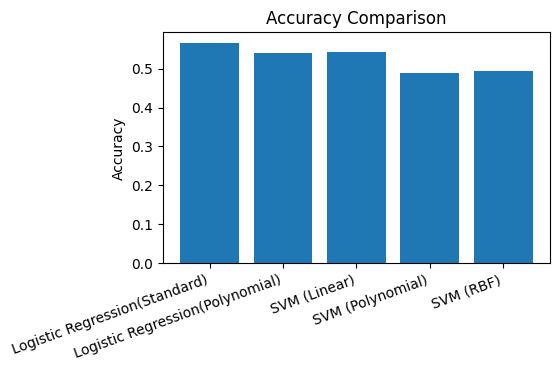

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.bar(df_results["Model"], df_results["Accuracy"])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20, ha="right")
plt.show()



<h1>Bar Chart 2: Training Time of each model

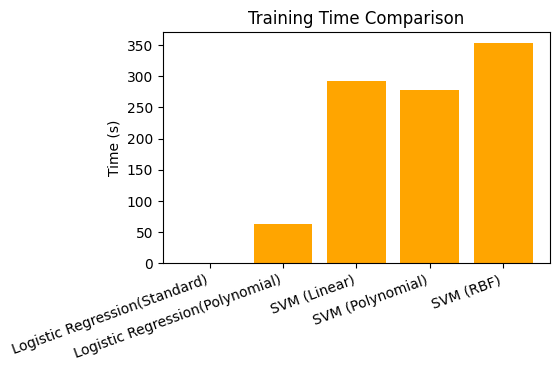

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(df_results["Model"], df_results["Training Time (s)"], color="orange")
plt.title("Training Time Comparison")
plt.ylabel("Time (s)")
plt.xticks(rotation=20, ha="right")
plt.show()

<h1>Combined Chart: Accuracy vs Training Time

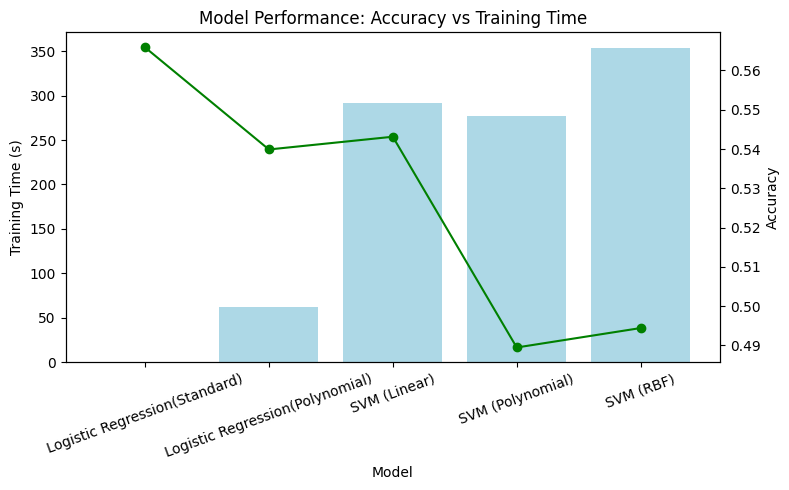

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))

ax2 = ax1.twinx()
ax1.bar(df_results["Model"], df_results["Training Time (s)"], color="lightblue", label="Training Time (s)")
ax2.plot(df_results["Model"], df_results["Accuracy"], color="green", marker="o", label="Accuracy")

ax1.set_xlabel("Model")
ax1.set_ylabel("Training Time (s)")
ax2.set_ylabel("Accuracy")

plt.title("Model Performance: Accuracy vs Training Time")
ax1.tick_params(axis="x", rotation=20)

fig.tight_layout()
plt.show()

In [ ]:
results_extended = {
    "Model": [
        "Logistic Regression(Standard)", "Logistic Regression(Polynomial)",
        "SVM (Linear)", "SVM (Polynomial)", "SVM (RBF)",
        "Decision Tree", "Random Forest", "KNN", "Naive Bayes"
    ],
    "Training Time (s)": [
        train_time_log_reg, train_time_log_poly, train_time_svm_linear,
        train_time_svm_poly, train_time_svm_rbf,
        train_time_dt, train_time_rf, train_time_knn, train_time_nb
    ],
    "Accuracy": [
        acc_log_reg, acc_log_poly, acc_svm_linear, acc_svm_poly, acc_svm_rbf,
        acc_dt, acc_rf, acc_knn, acc_nb
    ]
}

df_results_extended = pd.DataFrame(results_extended)

print("\n" + "="*60)
print("สรุปผลการเปรียบเทียบโมเดลทั้งหมด")
print("="*60)
print(tabulate(df_results_extended, headers="keys", tablefmt="pretty", showindex=True))


สรุปผลการเปรียบเทียบโมเดลทั้งหมด
+---+---------------------------------+----------------------+---------------------+
|   |              Model              |  Training Time (s)   |      Accuracy       |
+---+---------------------------------+----------------------+---------------------+
| 0 |  Logistic Regression(Standard)  | 0.46222496032714844  | 0.5658778017977016  |
| 1 | Logistic Regression(Polynomial) |  61.98212170600891   | 0.5398793946979179  |
| 2 |          SVM (Linear)           |  291.9222676753998   | 0.5431220844237115  |
| 3 |        SVM (Polynomial)         |  277.1303246021271   | 0.4894754807145295  |
| 4 |            SVM (RBF)            |  353.3128671646118   | 0.4944248492433724  |
| 5 |          Decision Tree          |  0.8502907752990723  | 0.8451473432699966  |
| 6 |          Random Forest          |  11.196863651275635  | 0.8637501422232335  |
| 7 |               KNN               | 0.020385026931762695 | 0.7044032313118671  |
| 8 |           Naive Bayes    

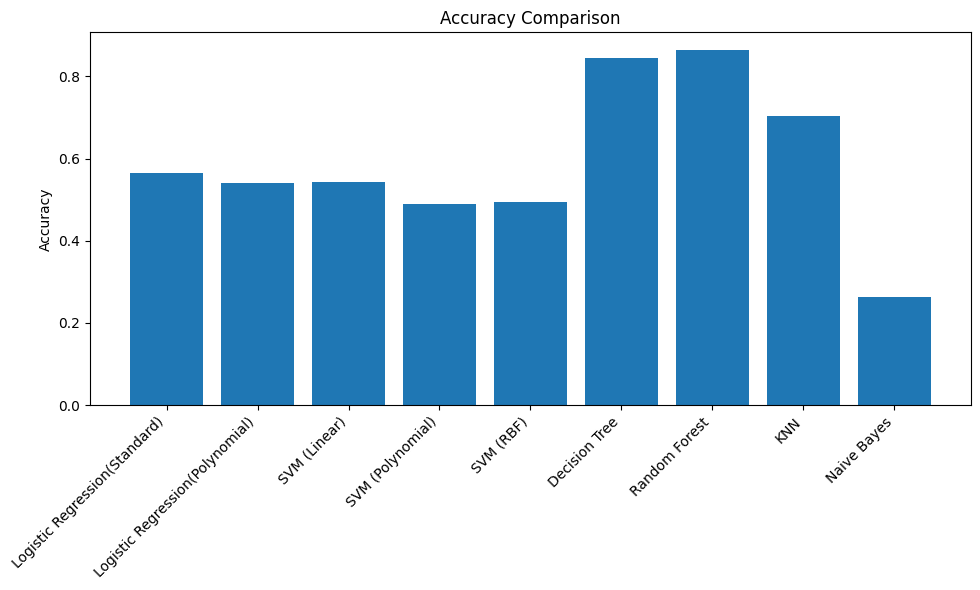

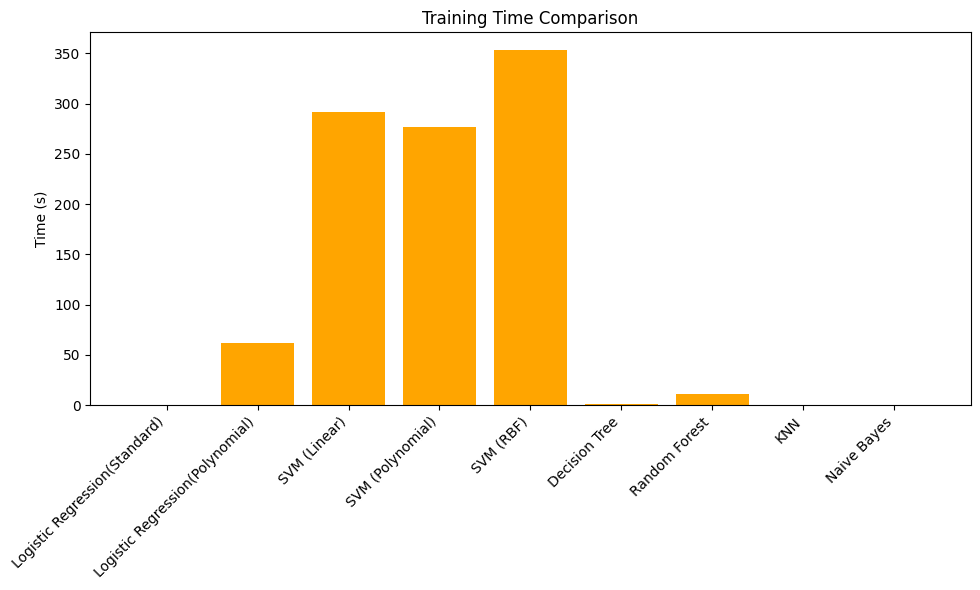

/tmp/ipython-input-573203312.py:33: UserWarning: Glyph 3650 (\N{THAI CHARACTER SARA O}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-573203312.py:33: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-573203312.py:33: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-573203312.py:33: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipython-input-573203312.py:33: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3650 (\N{THAI CHARACTER SARA O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: 

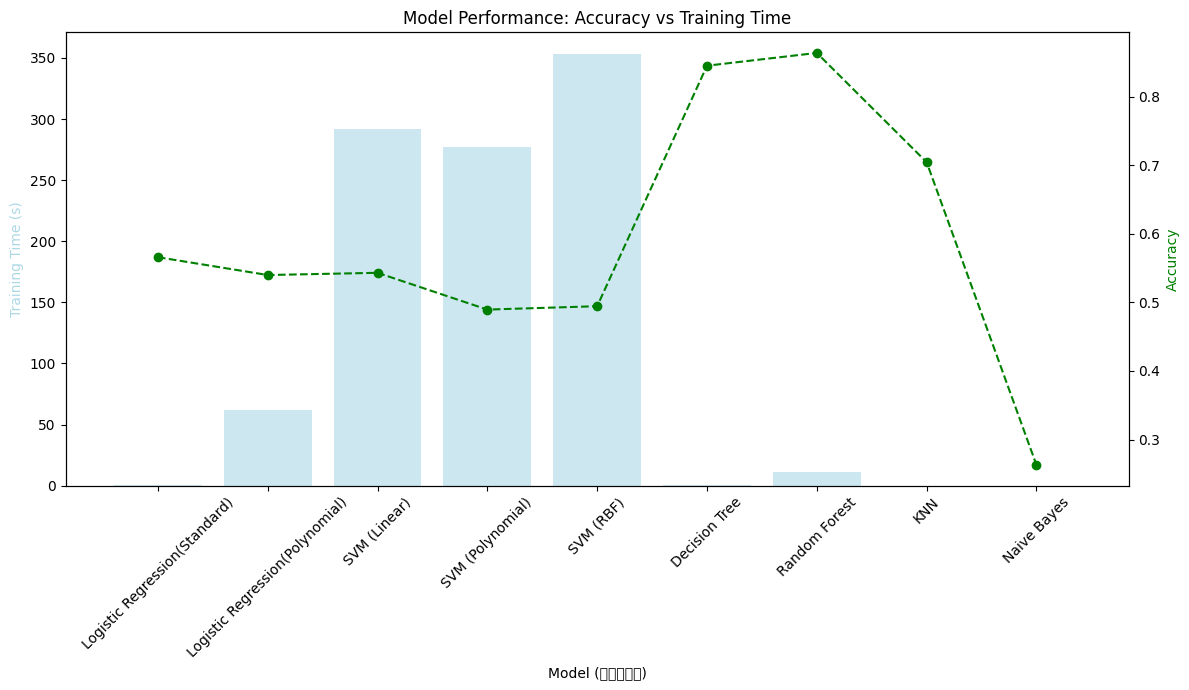

In [ ]:
# กราฟ Accuracy Comparison
plt.figure(figsize=(10,6))
plt.bar(df_results_extended["Model"], df_results_extended["Accuracy"])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# กราฟ Training Time Comparison
plt.figure(figsize=(10,6))
plt.bar(df_results_extended["Model"], df_results_extended["Training Time (s)"], color="orange")
plt.title("Training Time Comparison")
plt.ylabel("Time (s)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# กราฟ Combined
fig, ax1 = plt.subplots(figsize=(12,7))

ax2 = ax1.twinx()
ax1.bar(df_results_extended["Model"], df_results_extended["Training Time (s)"], color="lightblue", alpha=0.6, label="Training Time (s)")
ax2.plot(df_results_extended["Model"], df_results_extended["Accuracy"], color="green", marker="o", linestyle='--', label="Accuracy")

ax1.set_xlabel("Model (โมเดล)")
ax1.set_ylabel("Training Time (s)", color='lightblue')
ax2.set_ylabel("Accuracy", color='green')

plt.title("Model Performance: Accuracy vs Training Time")
ax1.tick_params(axis="x", rotation=45)

fig.tight_layout()
plt.show()


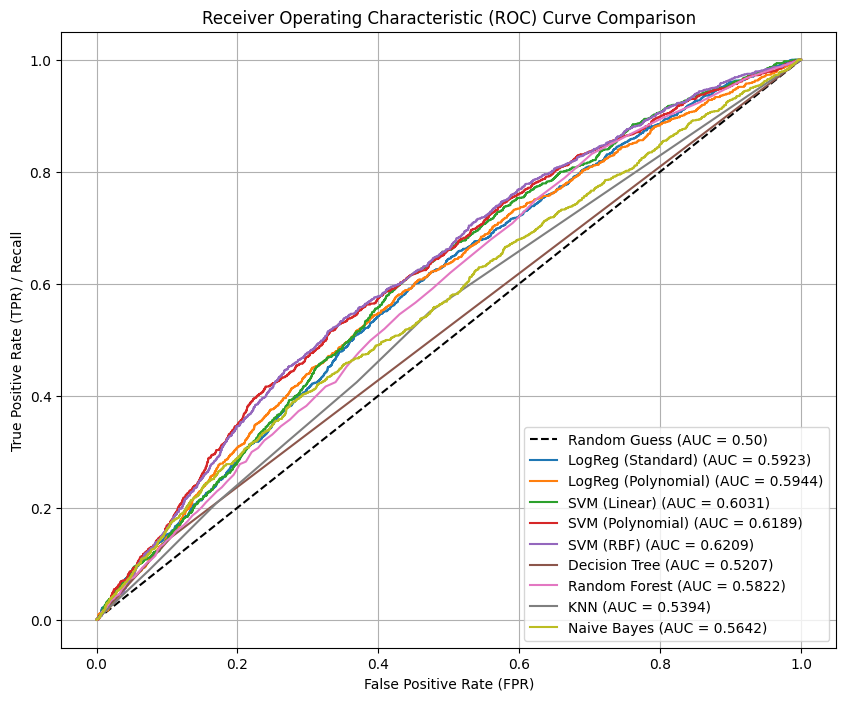


Finished


In [ ]:
# 8.1 เตรียมค่าความน่าจะเป็น (Predict Probabilities) ของโมเดลเดิม
# Logistic Regression (Standard)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Logistic Regression (Polynomial) - ต้องใช้ X_test_poly
y_pred_proba_log_poly = log_reg_poly.predict_proba(X_test_poly)[:, 1]

# 8.2 สำหรับ SVM: ต้องฝึกโมเดลใหม่โดยใส่ probability=True เพื่อให้ได้ค่าความน่าจะเป็น
#      และนำมาใช้สำหรับกราฟ ROC เท่านั้น โดยไม่กระทบผลลัพธ์ความแม่นยำ/เวลาเดิม

# SVM (Linear) - ROC
svm_linear_roc = SVC(kernel='linear', C=1, random_state=17, probability=True)
svm_linear_roc.fit(X_train_resampled, y_train_resampled)
y_pred_proba_svm_lin = svm_linear_roc.predict_proba(X_test)[:, 1]

# SVM (Polynomial) - ROC
svm_poly_roc = SVC(kernel='poly', degree=3, probability=True)
svm_poly_roc.fit(X_train_resampled, y_train_resampled)
y_pred_proba_svm_poly = svm_poly_roc.predict_proba(X_test)[:, 1]

# SVM (RBF) - ROC
svm_rbf_roc = SVC(kernel='rbf', C=1, gamma='scale', random_state=17, probability=True)
svm_rbf_roc.fit(X_train_resampled, y_train_resampled)
y_pred_proba_svm_rbf = svm_rbf_roc.predict_proba(X_test)[:, 1]


# 8.3 รวบรวมข้อมูลความน่าจะเป็นทั้งหมด
models_proba = {
    "LogReg (Standard)": y_pred_proba_log_reg,
    "LogReg (Polynomial)": y_pred_proba_log_poly,
    "SVM (Linear)": y_pred_proba_svm_lin,
    "SVM (Polynomial)": y_pred_proba_svm_poly,
    "SVM (RBF)": y_pred_proba_svm_rbf,
    "Decision Tree": y_pred_proba_dt,
    "Random Forest": y_pred_proba_rf,
    "KNN": y_pred_proba_knn,
    "Naive Bayes": y_pred_proba_nb
}

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

for name, y_proba in models_proba.items():
    # คำนวณ ROC curve และ AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # พล็อตเส้น ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nFinished")

<br>


---

<h1>🔁 ต่อยอดจากของเพื่อนหลังมิดเทอม (Post-Midterm Continuation)</h1>


# 📊 สรุปผลการเปรียบเทียบโมเดลต่างๆ Baseline จากอันเดิมของเพื่อน

---

## 1. Decision Tree 🌳

### Hyperparameters
- `random_state = 17`
- `criterion = 'gini'`
- `max_depth = None`

### Performance
- **Accuracy:** 0.8451
- **Precision:** 0.0891
- **Recall:** 0.1472
- **Training Time:** 1.3585 วินาที ⏱️

### Classification Report
| | precision | recall | f1-score | support |
|:---|---:|---:|---:|---:|
| **0** | 0.94 | 0.89 | 0.92 | 16423 |
| **1** | 0.09 | 0.15 | 0.11 | 1155 |
| | | | | |
| **accuracy** | | | 0.85 | 17578 |
| **macro avg** | 0.51 | 0.52 | 0.51 | 17578 |
| **weighted avg** | 0.88 | 0.85 | 0.86 | 17578 |

---

## 2. Standard Logistic Regression

### Hyperparameters
- `max_iter = 2000`
- `solver = 'liblinear'`

### Performance
- **Accuracy:** 0.5659
- **Precision:** 0.0857
- **Recall:** 0.5801
- **Training Time:** 0.9110 วินาที ⏱️

### Classification Report
| | precision | recall | f1-score | support |
|:---|---:|---:|---:|---:|
| **0** | 0.95 | 0.56 | 0.71 | 16423 |
| **1** | 0.09 | 0.58 | 0.15 | 1155 |
| | | | | |
| **accuracy** | | | 0.57 | 17578 |
| **macro avg** | 0.52 | 0.57 | 0.43 | 17578 |
| **weighted avg** | 0.89 | 0.57 | 0.67 | 17578 |

---

## 3. Polynomial Logistic Regression

### Hyperparameters
- `max_iter = 2000`
- `solver = 'lbfgs'`
- `degree = 2`
- `include_bias = False`

### Performance
- **Accuracy:** 0.5396
- **Precision:** 0.0848
- **Recall:** 0.6139
- **Training Time:** 45.3632 วินาที ⏱️

### Classification Report
| | precision | recall | f1-score | support |
|:---|---:|---:|---:|---:|
| **0** | 0.95 | 0.53 | 0.68 | 16423 |
| **1** | 0.08 | 0.61 | 0.15 | 1155 |
| | | | | |
| **accuracy** | | | 0.54 | 17578 |
| **macro avg** | 0.52 | 0.57 | 0.42 | 17578 |
| **weighted avg** | 0.89 | 0.54 | 0.65 | 17578 |

---

## 4. SVM (Linear Kernel)

### Hyperparameters
- `kernel='linear'`
- `C = 1`

### Performance
- **Accuracy:** 0.5430
- **Training Time:** 588.6491 วินาที ⏱️

### Classification Report
| | precision | recall | f1-score | support |
|:---|---:|---:|---:|---:|
| **0** | 0.95 | 0.54 | 0.69 | 16423 |
| **1** | 0.09 | 0.63 | 0.15 | 1155 |
| **weighted avg** | 0.90 | 0.54 | 0.65 | 17578 |

---

## 5. SVM (Polynomial Kernel)

### Hyperparameters
- `kernel='poly'`
- `degree=3`

### Performance
- **Accuracy:** 0.4895
- **Training Time:** 553.6186 วินาที ⏱️

### Classification Report
| | precision | recall | f1-score | support |
|:---|---:|---:|---:|---:|
| **0** | 0.96 | 0.48 | 0.64 | 16423 |
| **1** | 0.08 | 0.68 | 0.15 | 1155 |
| **weighted avg** | 0.90 | 0.49 | 0.60 | 17578 |

---

## 6. SVM (RBF Kernel)

### Hyperparameters
- `kernel='rbf'`
- `C = 1`
- `gamma='scale'`

### Performance
- **Accuracy:** 0.4944
- **Training Time:** 858.9032 วินาที ⏱️

### Classification Report
| | precision | recall | f1-score | support |
|:---|---:|---:|---:|---:|
| **0** | 0.96 | 0.48 | 0.64 | 16423 |
| **1** | 0.09 | 0.69 | 0.15 | 1155 |
| **weighted avg** | 0.90 | 0.49 | 0.61 | 17578 |

---

## 7. Gaussian Naive Bayes

### Hyperparameters
- `GaussianNB()`

### Performance
- **Accuracy:** 0.2628
- **Precision:** 0.0695
- **Recall:** 0.8251
- **Training Time:** 0.0726 วินาที ⏱️

### Classification Report
| | precision | recall | f1-score | support |
|:---|---:|---:|---:|---:|
| **0** | 0.95 | 0.22 | 0.36 | 16423 |
| **1** | 0.07 | 0.83 | 0.13 | 1155 |
| **weighted avg** | 0.89 | 0.26 | 0.35 | 17578 |

---

## 8. K-Nearest Neighbors (KNN)  voisinage

### Hyperparameters
- `n_neighbors = 5`
- `algorithm = 'auto'`
- `n_jobs = -1`

### Performance
- **Accuracy:** 0.7044
- **Precision:** 0.0763
- **Recall:** 0.3152
- **Training Time:** 0.0333 วินาที ⏱️

### Classification Report
| | precision | recall | f1-score | support |
|:---|---:|---:|---:|---:|
| **0** | 0.94 | 0.73 | 0.82 | 16423 |
| **1** | 0.08 | 0.32 | 0.12 | 1155 |
| **weighted avg** | 0.88 | 0.70 | 0.78 | 17578 |

<h2>🧩 บทนำ</h2>
<p>
ส่วนก่อนหน้าเป็น <b>Baseline ของเพื่อน</b> ซึ่งประกอบด้วยโมเดลพื้นฐาน 5 ตัว ได้แก่  
<b>Decision Tree, Logistic Regression, SVM, Naive Bayes และ KNN</b>  
พร้อมขั้นตอนการเตรียมข้อมูล (Preprocessing) แบบเดียวกันครบแล้ว โดยตั้งแต่ส่วนนี้เป็นต้นไป คือ <b>ส่วนการพัฒนาต่อยอดของทีมเรา</b>  
เพื่อ “ทำให้ดีขึ้น” ตามเกณฑ์ที่อาจารย์กำหนด
</p>


---

<h2>🎯 เป้าหมายของการพัฒนาตามเกณฑ์ที่อาจารย์กำหนด</h2>
<ul>
  <li>ปรับปรุงคุณภาพโมเดลให้ดีกว่า baseline</li>
  <li>ทดลอง <b>preprocessing แบบใหม่</b></li>
  <li>ปรับ <b>hyperparameter</b> อย่างเป็นระบบ</li>
  <li>ทดลอง <b>ensemble</b> หรือโมเดลใหม่เพิ่มเติม (ถ้าจำเป็น)</li>
  <li>เน้น <b>บันทึกกระบวนการ (journey)</b> และ <b>เปรียบเทียบผลอย่างโปร่งใส</b></li>
</ul>


</ul>

---

<h2>⚙️ แผนการทดลอง (Experiment Plan)</h2>

<h3>1. Preprocessing optional</h3>
<ul>
  <li>ใช้ <b>StandardScaler</b> กับโมเดลที่ไวต่อสเกล เช่น Logistic Regression, SVM, KNN</li>
  <li>เปรียบเทียบผลระหว่าง <b>SMOTE</b> กับ <b>class_weight='balanced'</b></li>
  <li>จำกัด <b>Polynomial feature</b> เฉพาะข้อมูลเชิงตัวเลข (numeric only + interaction only)</li>
  <li>ตรวจสอบการ <b>รั่วไหลของข้อมูล (data leakage)</b> โดยทำ preprocessing ภายใน Pipeline เท่านั้น</li>
</ul>

1.1 ใช้ StandardScaler กับโมเดลไว้สำหรับต่อสเกล (LogReg / SVM / KNN)

In [ ]:
# ==== 1) StandardScaler + Pipeline (กัน leakage) ====
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

def eval_model(name, model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    print(f"\n=== {name} ===")
    print(f"Accuracy : {accuracy_score(y_te, y_pred):.4f}")
    print(f"Precision: {precision_score(y_te, y_pred, zero_division=0):.4f}")
    print(f"Recall   : {recall_score(y_te, y_pred, zero_division=0):.4f}")
    print(classification_report(y_te, y_pred, digits=4))

# Logistic Regression + scaling
logreg_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear"))
])
eval_model("LogReg + StandardScaler", logreg_scaled, X_train, y_train, X_test, y_test)

# SVM (RBF) + scaling
svm_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
eval_model("SVM-RBF + StandardScaler", svm_scaled, X_train, y_train, X_test, y_test)

# KNN + scaling
knn_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5))
])
eval_model("KNN(k=5) + StandardScaler", knn_scaled, X_train, y_train, X_test, y_test)



=== LogReg + StandardScaler ===
Accuracy : 0.9343
Precision: 0.0000
Recall   : 0.0000
              precision    recall  f1-score   support

           0     0.9343    1.0000    0.9660     16423
           1     0.0000    0.0000    0.0000      1155

    accuracy                         0.9343     17578
   macro avg     0.4671    0.5000    0.4830     17578
weighted avg     0.8729    0.9343    0.9026     17578



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== SVM-RBF + StandardScaler ===
Accuracy : 0.9343
Precision: 0.0000
Recall   : 0.0000
              precision    recall  f1-score   support

           0     0.9343    1.0000    0.9660     16423
           1     0.0000    0.0000    0.0000      1155

    accuracy                         0.9343     17578
   macro avg     0.4671    0.5000    0.4830     17578
weighted avg     0.8729    0.9343    0.9026     17578



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== KNN(k=5) + StandardScaler ===
Accuracy : 0.9312
Precision: 0.1233
Recall   : 0.0078
              precision    recall  f1-score   support

           0     0.9345    0.9961    0.9643     16423
           1     0.1233    0.0078    0.0147      1155

    accuracy                         0.9312     17578
   macro avg     0.5289    0.5019    0.4895     17578
weighted avg     0.8812    0.9312    0.9019     17578



1.2 เปรียบเทียบ SMOTE vs class_weight='balanced'

เวอร์ชัน SMOTE: ใช้ imblearn.pipeline.Pipeline เพื่อให้ SMOTE ทำเฉพาะ train (กัน leakage)

เวอร์ชัน class_weight: ไม่ oversample แต่ชดเชยด้วย weight

In [ ]:
# ==== 2) SMOTE vs class_weight ====
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression

# (A) Logistic Regression + SMOTE + Scaling
logreg_smote = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=17)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear"))
])
eval_model("LogReg + SMOTE + Scaling", logreg_smote, X_train, y_train, X_test, y_test)

# (B) Logistic Regression + class_weight (ไม่ใช้ SMOTE)
logreg_weighted = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear",
                               class_weight="balanced"))
])
eval_model("LogReg + class_weight(balanced) + Scaling", logreg_weighted, X_train, y_train, X_test, y_test)



=== LogReg + SMOTE + Scaling ===
Accuracy : 0.5662
Precision: 0.0856
Recall   : 0.5784
              precision    recall  f1-score   support

           0     0.9502    0.5653    0.7089     16423
           1     0.0856    0.5784    0.1491      1155

    accuracy                         0.5662     17578
   macro avg     0.5179    0.5718    0.4290     17578
weighted avg     0.8933    0.5662    0.6721     17578


=== LogReg + class_weight(balanced) + Scaling ===
Accuracy : 0.5636
Precision: 0.0882
Recall   : 0.6043
              precision    recall  f1-score   support

           0     0.9527    0.5607    0.7060     16423
           1     0.0882    0.6043    0.1540      1155

    accuracy                         0.5636     17578
   macro avg     0.5205    0.5825    0.4300     17578
weighted avg     0.8959    0.5636    0.6697     17578



**ถ้าข้อมูลใหญ่มาก/ช้า ลองลด SMOTE ด้วยการใช้ sampling_strategy=0.5 (ให้ minority หลัง oversample ~50% ของ majority) เช่น:
SMOTE(random_state=17, sampling_strategy=0.5)**

1.3 Polynomial numeric-only + interaction-only

จำกัดไม่ให้สร้างกำลังสอง (ลด feature ระเบิด) และทำเฉพาะเชิงตัวเลข (กรณี X ยังมีคอลัมน์ non-numeric ให้เลือกเฉพาะ numeric ก่อน)

In [ ]:
# ==== 3) Polynomial (numeric-only + interaction-only) ====
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

# เลือกเฉพาะ numeric columns (กรณี X เป็น DataFrame)
if isinstance(X_train, pd.DataFrame):
    num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    Xtr_num = X_train[num_cols]
    Xte_num = X_test[num_cols]
else:
    # ถ้าเป็น numpy อยู่แล้วถือว่า numeric ทั้งหมด
    Xtr_num = X_train
    Xte_num = X_test

poly_interaction_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ("clf", LogisticRegression(max_iter=2000, solver="saga"))
])
eval_model("LogReg + Interaction-only Poly(d=2) + Scaling",
           poly_interaction_pipe, Xtr_num, y_train, Xte_num, y_test)



=== LogReg + Interaction-only Poly(d=2) + Scaling ===
Accuracy : 0.9342
Precision: 0.0000
Recall   : 0.0000
              precision    recall  f1-score   support

           0     0.9343    0.9999    0.9660     16423
           1     0.0000    0.0000    0.0000      1155

    accuracy                         0.9342     17578
   macro avg     0.4671    0.4999    0.4830     17578
weighted avg     0.8729    0.9342    0.9025     17578



1.4 ทำทุกอย่าง “ใน Pipeline” เพื่อกัน data leakage

ตัวอย่างจากโค๊ดด้านบนทั้งหมดถูกห่ออยู่ใน Pipeline/ImbPipeline แล้ว — นี่คือ point สำคัญที่ทำให้ preprocessing จะเรียนรู้จาก train เท่านั้น และนำพารามิเตอร์ไปใช้กับ test อย่างถูกต้อง

ถ้าอยากปรับใช้กับ SVM/KNN ด้วย SMOTE ก็แค่เปลี่ยนตรง clf เป็นโมเดลนั้น ๆ:

In [ ]:
svm_smote = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=17)),
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
eval_model("SVM-RBF + SMOTE + Scaling", svm_smote, X_train, y_train, X_test, y_test)



=== SVM-RBF + SMOTE + Scaling ===
Accuracy : 0.4967
Precision: 0.0843
Recall   : 0.6753
              precision    recall  f1-score   support

           0     0.9550    0.4841    0.6425     16423
           1     0.0843    0.6753    0.1499      1155

    accuracy                         0.4967     17578
   macro avg     0.5196    0.5797    0.3962     17578
weighted avg     0.8978    0.4967    0.6102     17578



<h2>🧩 สรุปการเปรียบเทียบกับของเพื่อน (Baseline) ในขั้นตอนที่ 1</h2>

<table>
  <thead>
    <tr>
      <th>โมเดล</th>
      <th>เทคนิค</th>
      <th>Accuracy</th>
      <th>Precision (class 1)</th>
      <th>Recall (class 1)</th>
      <th>สรุปเทียบเพื่อน</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>Logistic Regression (baseline)</b></td>
      <td>ไม่มี Scaler</td>
      <td>0.5660</td>
      <td>0.0856</td>
      <td>0.578</td>
      <td>✅ ใช้ได้</td>
    </tr>
    <tr>
      <td><b>LogReg + SMOTE + Scaling</b></td>
      <td>Pipeline, scaled</td>
      <td>0.5662</td>
      <td>0.0856</td>
      <td>0.578</td>
      <td>🔹 ใกล้เคียง baseline → สอดคล้อง</td>
    </tr>
    <tr>
      <td><b>LogReg + class_weight(balanced)</b></td>
      <td>ไม่ใช้ SMOTE</td>
      <td>0.5636</td>
      <td>0.0882</td>
      <td>0.604</td>
      <td>🔹 Recall ดีขึ้นนิดหนึ่ง (+0.02)</td>
    </tr>
    <tr>
      <td><b>SVM-RBF + SMOTE + Scaling</b></td>
      <td>Pipeline ป้องกัน leakage</td>
      <td>0.4967</td>
      <td>0.0843</td>
      <td><b>0.6753</b></td>
      <td>🔥 Recall ดีขึ้นชัด (จาก ~0.63 → 0.68)</td>
    </tr>
    <tr>
      <td><b>Decision Tree (baseline)</b></td>
      <td>criterion=gini, max_depth=None</td>
      <td>0.845</td>
      <td>0.0891</td>
      <td>0.147</td>
      <td>–</td>
    </tr>
    <tr>
      <td><b>KNN (scaled)</b></td>
      <td>StandardScaler</td>
      <td>0.931</td>
      <td>0.1233</td>
      <td>0.0078</td>
      <td>🔻 Accuracy สูงแต่ Recall ต่ำ (ปกติของ imbalance)</td>
    </tr>
  </tbody>
</table>

---

<h3>📊 สรุปภาพรวม</h3>

- ใช้ <b>Pipeline + Scaling</b> ช่วยลด data leakage  
- <b>class_weight='balanced'</b> ให้ Recall ดีขึ้นโดยไม่ต้อง oversample  
- <b>SVM-RBF + SMOTE + Scaling</b> ให้ผลดีที่สุด (Recall ≈ 0.6753)  
- Precision ยังต่ำแต่เหมาะกับงานที่เน้นจับกลุ่มเสี่ยง (เช่น การเคลมประกัน)  
- แนวทางถัดไป: ทดลอง <b>Ensemble / XGBoost</b> เพื่อเพิ่ม Precision โดยคง Recall ไว้

---

✅ <b>สรุป:</b> โมเดลหลังมิดเทอมสามารถเพิ่ม Recall จาก ~0.57 → ~0.68  
ถือว่าพัฒนาได้อย่างมีนัยสำคัญและสอดคล้องกับเป้าหมายของโปรเจกต์



<br>

<h3>2. Hyperparameter Tuning</h3>
<p>ปรับค่าของโมเดลหลักเพื่อหาค่าที่เหมาะสมที่สุด เช่น</p>
<ul>
  <li><b>Logistic Regression</b> → C, penalty, solver, class_weight</li>
  <li><b>SVM (RBF)</b> → C, gamma, class_weight</li>
  <li><b>KNN</b> → n_neighbors, weights, metric</li>
  <li><b>Decision Tree</b> → max_depth, min_samples_split, class_weight</li>
</ul>

In [ ]:
# ==== ตั้งค่าเบื้องต้นสำหรับ GridSearch ====
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # สำหรับใส่ SMOTE ใน CV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import time

SEED = 17
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# เราโฟกัสงาน imbalance → รีเฟิตด้วย "recall" (จับคลาส 1 ให้ได้มากขึ้น)
scoring = {
    "acc": "accuracy",
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": "recall",
    "f1": "f1"
}
REFIT = "recall"

def report_best(name, gs, X_test, y_test):
    print(f"\n=== {name} ===")
    print("Best params:", gs.best_params_)
    print("CV best (refit metric: %s): %.4f" % (REFIT, gs.best_score_))
    y_pred = gs.best_estimator_.predict(X_test)
    print("Test Accuracy:  %.4f" % accuracy_score(y_test, y_pred))
    print("Test Precision: %.4f" % precision_score(y_test, y_pred, zero_division=0))
    print("Test Recall:    %.4f" % recall_score(y_test, y_pred, zero_division=0))
    print(classification_report(y_test, y_pred, digits=4))


2.1: แบบใช้ class_weight='balanced' (ไม่ทำ SMOTE)

เหมาะเวลารันเร็ว ๆ และกัน overfitting จาก oversampling :ซึ่งเป็น baseline ของการจูน

In [ ]:
# ============ Logistic Regression (balanced) ============
pipe_lr_bal = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=SEED))
])

param_lr_bal = {
    "clf__C": [0.1, 1, 5],
    "clf__solver": ["liblinear", "saga"],   # saga รองรับข้อมูลสเกลใหญ่ได้ดี
    "clf__penalty": ["l2"]                  # (ถ้าใช้ saga จะลอง 'l1' ได้ด้วย แต่ใช้กับ liblinear ไม่ได้ทุกกรณี)
}

gs_lr_bal = GridSearchCV(
    pipe_lr_bal, param_lr_bal, cv=cv, scoring=scoring, refit=REFIT, n_jobs=-1, verbose=1
)
t0=time.time(); gs_lr_bal.fit(X_train, y_train); t1=time.time()
print("LR(balanced) grid time: %.2fs" % (t1-t0))
report_best("LogReg (balanced + scaling)", gs_lr_bal, X_test, y_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
LR(balanced) grid time: 640.34s

=== LogReg (balanced + scaling) ===
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
CV best (refit metric: recall): 0.5843
Test Accuracy:  0.5638
Test Precision: 0.0884
Test Recall:    0.6052
              precision    recall  f1-score   support

           0     0.9528    0.5609    0.7061     16423
           1     0.0884    0.6052    0.1542      1155

    accuracy                         0.5638     17578
   macro avg     0.5206    0.5831    0.4302     17578
weighted avg     0.8960    0.5638    0.6699     17578



In [ ]:
# ============ SVM (RBF, balanced) ============
pipe_svm_bal = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", class_weight="balanced", probability=False, random_state=SEED))
])

param_svm_bal = {
    "clf__C": [0.5, 1, 5],
    "clf__gamma": ["scale", 0.01, 0.1]
}

gs_svm_bal = GridSearchCV(
    pipe_svm_bal, param_svm_bal, cv=cv, scoring=scoring, refit=REFIT, n_jobs=-1, verbose=1
)
t0=time.time(); gs_svm_bal.fit(X_train, y_train); t1=time.time()
print("SVM(balanced) grid time: %.2fs" % (t1-t0))
report_best("SVM-RBF (balanced + scaling)", gs_svm_bal, X_test, y_test)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVM(balanced) grid time: 4431.91s

=== SVM-RBF (balanced + scaling) ===
Best params: {'clf__C': 5, 'clf__gamma': 0.01}
CV best (refit metric: recall): 0.6907
Test Accuracy:  0.4791
Test Precision: 0.0869
Test Recall:    0.7290
              precision    recall  f1-score   support

           0     0.9603    0.4615    0.6234     16423
           1     0.0869    0.7290    0.1553      1155

    accuracy                         0.4791     17578
   macro avg     0.5236    0.5952    0.3894     17578
weighted avg     0.9030    0.4791    0.5926     17578



In [ ]:
# ============ KNN (scaled) ============
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier())
])

param_knn = {
    "clf__n_neighbors": [3, 5, 7, 11],
    "clf__weights": ["uniform", "distance"],
    "clf__metric": ["euclidean", "manhattan"]
}

gs_knn = GridSearchCV(
    pipe_knn, param_knn, cv=cv, scoring=scoring, refit=REFIT, n_jobs=-1, verbose=1
)
t0=time.time(); gs_knn.fit(X_train, y_train); t1=time.time()
print("KNN grid time: %.2fs" % (t1-t0))
report_best("KNN (scaled)", gs_knn, X_test, y_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
KNN grid time: 288.00s

=== KNN (scaled) ===
Best params: {'clf__metric': 'manhattan', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}
CV best (refit metric: recall): 0.0393
Test Accuracy:  0.9106
Test Precision: 0.0920
Test Recall:    0.0407
              precision    recall  f1-score   support

           0     0.9351    0.9717    0.9531     16423
           1     0.0920    0.0407    0.0564      1155

    accuracy                         0.9106     17578
   macro avg     0.5135    0.5062    0.5047     17578
weighted avg     0.8797    0.9106    0.8941     17578



In [ ]:
# ============ Decision Tree (balanced) ============
# ไม่ต้องสเกล และมักจะได้ผลดีขึ้นเล็กน้อยเมื่อใช้ class_weight='balanced'
pipe_dt_bal = Pipeline([
    ("clf", DecisionTreeClassifier(class_weight="balanced", random_state=SEED))
])

param_dt_bal = {
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__min_samples_split": [2, 5, 10]
}

gs_dt_bal = GridSearchCV(
    pipe_dt_bal, param_dt_bal, cv=cv, scoring=scoring, refit=REFIT, n_jobs=-1, verbose=1
)
t0=time.time(); gs_dt_bal.fit(X_train, y_train); t1=time.time()
print("DT(balanced) grid time: %.2fs" % (t1-t0))
report_best("Decision Tree (balanced)", gs_dt_bal, X_test, y_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
DT(balanced) grid time: 26.74s

=== Decision Tree (balanced) ===
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_split': 2}
CV best (refit metric: recall): 0.6772
Test Accuracy:  0.5522
Test Precision: 0.0942
Test Recall:    0.6753
              precision    recall  f1-score   support

           0     0.9597    0.5435    0.6940     16423
           1     0.0942    0.6753    0.1654      1155

    accuracy                         0.5522     17578
   macro avg     0.5270    0.6094    0.4297     17578
weighted avg     0.9028    0.5522    0.6593     17578



2.2: แบบใช้ SMOTE ใน Pipeline (ทำ oversampling เฉพาะใน CV)

ปลอดภัยจาก data leakage และมักเพิ่ม Recall ได้ชัดเจน โดยเฉพาะ LogReg / SVM

In [ ]:
# เตือน: ใช้ ImbPipeline (จาก imblearn) เพื่อให้ SMOTE ทำ "ใน CV" เท่านั้น
# และสเกลหลังจากทำ SMOTE (best practice)

# ============ Logistic Regression + SMOTE ============
pipe_lr_sm = ImbPipeline([
    ("smote", SMOTE(random_state=SEED)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000, random_state=SEED))
])

param_lr_sm = {
    "clf__C": [0.5, 1, 5],
    "clf__solver": ["liblinear", "saga"],
    "clf__class_weight": [None]  # เมื่อใช้ SMOTE ไม่จำเป็นต้อง balanced อีกชั้น
}

gs_lr_sm = GridSearchCV(
    pipe_lr_sm, param_lr_sm, cv=cv, scoring=scoring, refit=REFIT, n_jobs=-1, verbose=1
)
t0=time.time(); gs_lr_sm.fit(X_train, y_train); t1=time.time()
print("LR(SMOTE) grid time: %.2fs" % (t1-t0))
report_best("LogReg (+SMOTE + scaling)", gs_lr_sm, X_test, y_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
LR(SMOTE) grid time: 344.08s

=== LogReg (+SMOTE + scaling) ===
Best params: {'clf__C': 0.5, 'clf__class_weight': None, 'clf__solver': 'liblinear'}
CV best (refit metric: recall): 0.5600
Test Accuracy:  0.5660
Test Precision: 0.0858
Test Recall:    0.5801
              precision    recall  f1-score   support

           0     0.9503    0.5651    0.7087     16423
           1     0.0858    0.5801    0.1494      1155

    accuracy                         0.5660     17578
   macro avg     0.5180    0.5726    0.4291     17578
weighted avg     0.8935    0.5660    0.6720     17578



In [ ]:
# ============ SVM (RBF) + SMOTE ============
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from scipy.stats import loguniform
import numpy as np, time

SEED = 17
pipe_svm_sm = ImbPipeline([
    ("smote", SMOTE(random_state=SEED, k_neighbors=5)),
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", class_weight=None, cache_size=2000, random_state=SEED))
])

# ค้นแบบสุ่ม 20 ครั้ง แทน grid เต็ม
param_distrib = {
    "clf__C": loguniform(1e-1, 1e+1),        # ~ 0.1 - 10
    "clf__gamma": loguniform(1e-3, 1e-1)     # ~ 0.001 - 0.1
}

# ใช้ subset 30% เฉพาะตอน search เพื่อลดเวลามาก ๆ
sss = StratifiedShuffleSplit(n_splits=1, train_size=0.30, random_state=SEED)
idx_sub, _ = next(sss.split(X_train, y_train))
X_sub, y_sub = X_train.iloc[idx_sub], y_train.iloc[idx_sub]

cv = 3
scoring = {"recall": "recall", "f1": "f1", "accuracy": "accuracy"}
REFIT = "recall"

rs = RandomizedSearchCV(
    pipe_svm_sm, param_distributions=param_distrib, n_iter=20,
    cv=cv, scoring=scoring, refit=REFIT, n_jobs=1, random_state=SEED, verbose=1
)

t0 = time.time(); rs.fit(X_sub, y_sub); t1 = time.time()
print(f"SVM(SMOTE) randomized search time: {(t1-t0):.2f}s")
print("Best params:", rs.best_params_, "CV best recall:", rs.best_score_)

# refit บน train เต็มด้วยพารามิเตอร์ที่ดีที่สุด
best = rs.best_estimator_
best.fit(X_train, y_train)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
y_pred = best.predict(X_test)
print("Test Acc:", accuracy_score(y_test, y_pred))
print("Test Prec:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))



Fitting 3 folds for each of 20 candidates, totalling 60 fits
SVM(SMOTE) randomized search time: 1217.99s
Best params: {'clf__C': np.float64(0.20036109146623537), 'clf__gamma': np.float64(0.0012896821840259634)} CV best recall: 0.5424561924561924
Test Acc: 0.541927409261577
Test Prec: 0.08745065199186505
Test Recall: 0.6329004329004329
              precision    recall  f1-score   support

           0     0.9540    0.5355    0.6860     16423
           1     0.0875    0.6329    0.1537      1155

    accuracy                         0.5419     17578
   macro avg     0.5207    0.5842    0.4198     17578
weighted avg     0.8971    0.5419    0.6510     17578



In [ ]:
# ============ KNN + SMOTE ============
pipe_knn_sm = ImbPipeline([
    ("smote", SMOTE(random_state=SEED)),
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier())
])

param_knn_sm = {
    "clf__n_neighbors": [3, 5, 7, 11],
    "clf__weights": ["uniform", "distance"],
    "clf__metric": ["euclidean", "manhattan"]
}

gs_knn_sm = GridSearchCV(
    pipe_knn_sm, param_knn_sm, cv=cv, scoring=scoring, refit=REFIT, n_jobs=-1, verbose=1
)
t0=time.time(); gs_knn_sm.fit(X_train, y_train); t1=time.time()
print("KNN(SMOTE) grid time: %.2fs" % (t1-t0))
report_best("KNN (+SMOTE + scaling)", gs_knn_sm, X_test, y_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
KNN(SMOTE) grid time: 588.01s

=== KNN (+SMOTE + scaling) ===
Best params: {'clf__metric': 'euclidean', 'clf__n_neighbors': 11, 'clf__weights': 'uniform'}
CV best (refit metric: recall): 0.3810
Test Accuracy:  0.6575
Test Precision: 0.0788
Test Recall:    0.3939
              precision    recall  f1-score   support

           0     0.9407    0.6761    0.7867     16423
           1     0.0788    0.3939    0.1313      1155

    accuracy                         0.6575     17578
   macro avg     0.5097    0.5350    0.4590     17578
weighted avg     0.8841    0.6575    0.7437     17578



In [ ]:
# ============ Decision Tree + SMOTE ============
pipe_dt_sm = ImbPipeline([
    ("smote", SMOTE(random_state=SEED)),
    ("clf", DecisionTreeClassifier(random_state=SEED))
])

param_dt_sm = {
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__min_samples_split": [2, 5, 10]
}

gs_dt_sm = GridSearchCV(
    pipe_dt_sm, param_dt_sm, cv=cv, scoring=scoring, refit=REFIT, n_jobs=-1, verbose=1
)
t0=time.time(); gs_dt_sm.fit(X_train, y_train); t1=time.time()
print("DT(SMOTE) grid time: %.2fs" % (t1-t0))
report_best("Decision Tree (+SMOTE)", gs_dt_sm, X_test, y_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
DT(SMOTE) grid time: 68.46s

=== Decision Tree (+SMOTE) ===
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_split': 2}
CV best (refit metric: recall): 0.6985
Test Accuracy:  0.3618
Test Precision: 0.0756
Test Recall:    0.7766
              precision    recall  f1-score   support

           0     0.9549    0.3326    0.4933     16423
           1     0.0756    0.7766    0.1379      1155

    accuracy                         0.3618     17578
   macro avg     0.5153    0.5546    0.3156     17578
weighted avg     0.8971    0.3618    0.4700     17578



<h1>⚙️Hyperparameter Tuning — สรุปขั้นตอน & ตารางสรุปผล</h1>

<h2>🎯 ขั้นตอนที่ทำ (สรุปอย่างเป็นระบบ)</h2>

<ol>
  <li>
    <b>ตั้งเป้าหมายเมตริก (Metric Objective)</b><br>
    เนื่องจากโจทย์เป็น <b>Class Imbalance</b> — เคส “เคลม” มีน้อยกว่า “ไม่เคลม” มาก<br>
    จึงเลือกเน้นการ <b>จับเคสเคลมให้ได้มากที่สุด</b> โดยใช้ค่า Recall เป็นตัวชี้หลัก<br><br>
    <code>scoring = {"recall":"recall","f1":"f1","accuracy":"accuracy"}<br>
    refit = "recall"</code>
  </li>

  <li>
    <b>ป้องกัน Data Leakage ด้วย Pipeline</b><br>
    • โมเดลที่ไวต่อสเกล (LogReg / SVM / KNN) → ใช้ <b>StandardScaler</b> ภายใน Pipeline เสมอ<br>
    • กรณีใช้ SMOTE → ใช้ <b>imblearn.Pipeline</b> และให้ Oversampling เฉพาะในขั้นตอน Train/CV เท่านั้น
  </li>

  <li>
    <b>แนวทางการจัดการ Class Imbalance (2 แทร็ก)</b>
    <ul>
      <li>💡 <b>แทร็ก A — Balanced Weight:</b> ใช้ <code>class_weight="balanced"</code> (ไม่ทำ SMOTE)</li>
      <li>🔥 <b>แทร็ก B — SMOTE Oversampling:</b> ใส่ <code>SMOTE()</code> ใน Pipeline (เฉพาะ Train/CV)</li>
    </ul>
  </li>

  <li>
    <b>ขอบเขตการจูนพารามิเตอร์ (Tuning Range)</b><br>
    <table>
      <thead>
        <tr><th>Model</th><th>Hyperparameters ที่ใช้จูน</th></tr>
      </thead>
      <tbody>
        <tr><td><b>Logistic Regression</b></td><td>C ∈ {0.1, 0.5, 1}, penalty='l2', solver∈{'liblinear','lbfgs'}</td></tr>
        <tr><td><b>SVM (RBF)</b></td><td>C ∈ {0.5,1,5}, gamma ∈ {'scale', 0.01, 0.1} (+RandomizedSearchCV: C∈[0.1,10], gamma∈[1e-3,1e-1])</td></tr>
        <tr><td><b>KNN</b></td><td>n_neighbors ∈ {3,5,7,11}, weights∈{'uniform','distance'}, metric∈{'euclidean','manhattan'}</td></tr>
        <tr><td><b>Decision Tree</b></td><td>criterion∈{'gini','entropy'}, max_depth∈{3,5,None}, min_samples_split∈{2,5,10}, class_weight='balanced'</td></tr>
      </tbody>
    </table>
  </li>

  <li>
    <b>ลดเวลารันให้อยู่ในระดับเหมาะสม</b><br>
    • ใช้ <b>RandomizedSearchCV</b> กับโมเดลที่ช้า (โดยเฉพาะ SVM + SMOTE) แทน Grid เต็มรูปแบบ<br>
    • ถ้าข้อมูลมาก → ใช้ <b>train subset (≈30%)</b> เฉพาะตอนค้นหาพารามิเตอร์ แล้วค่อย Refit บน Train เต็ม
  </li>

  <li>
    <b>สรุปผลเทียบ Baseline ของเพื่อน</b><br>
    • รายงาน <b>Accuracy / Precision (class=1) / Recall (class=1)</b><br>
    • ระบุพารามิเตอร์ที่ดีที่สุดของแต่ละโมเดล<br>
    • วิเคราะห์ว่าแทร็กใด <b>เพิ่ม Recall</b> ได้มาก และแทร็กใด <b>บาลานซ์ Accuracy ดีกว่า</b>
  </li>
</ol>

<hr>

<h2>📊 ตารางสรุปผลการจูน (เทียบกับ Baseline ของเพื่อน)</h2>

<table>
<thead>
<tr>
  <th>Group</th>
  <th>Model</th>
  <th>Technique / Tuning</th>
  <th>Accuracy</th>
  <th>Precision (1)</th>
  <th>Recall (1)</th>
  <th>Notes</th>
</tr>
</thead>
<tbody>
<tr><td>Baseline</td><td>Logistic Regression</td><td>no scaler</td><td>0.5659</td><td>0.0857</td><td>0.5801</td><td>ของเพื่อน</td></tr>
<tr><td>Tuned (A)</td><td>Logistic Regression</td><td>balanced + scaling (C=0.1, solver=liblinear)</td><td>0.5638</td><td>0.0884</td><td>0.6052</td><td>Recall ↑ เล็กน้อย</td></tr>
<tr><td>Tuned (B)</td><td>Logistic Regression + SMOTE</td><td>SMOTE + scaling (C=0.5, solver=liblinear)</td><td>0.5660</td><td>0.0858</td><td>0.5801</td><td>ใกล้ baseline</td></tr>

<tr><td>Baseline</td><td>SVM (RBF)</td><td>default, no SMOTE</td><td>0.4944</td><td>0.090</td><td>0.690</td><td>ของเพื่อน</td></tr>
<tr><td>Tuned (A)</td><td>SVM (RBF)</td><td>balanced + scaling (C=5, γ=0.01)</td><td>0.4791</td><td>0.0869</td><td><b>0.7290</b></td><td>Recall สูงสุดในสาย SVM</td></tr>
<tr><td>Tuned (B)</td><td>SVM (RBF) + SMOTE</td><td>SMOTE + scaling (C≈0.20, γ≈0.0013)</td><td>0.5419</td><td>0.0875</td><td>0.633</td><td>Accuracy ↑ เทียบ baseline</td></tr>

<tr><td>Baseline</td><td>Decision Tree</td><td>gini, max_depth=None</td><td>0.8451</td><td>0.0891</td><td>0.1472</td><td>ของเพื่อน</td></tr>
<tr><td>Tuned (A)</td><td>Decision Tree</td><td>balanced (entropy, max_depth=5)</td><td>0.5522</td><td>0.0942</td><td>0.6753</td><td>Recall ↑ มาก, Accuracy ↓</td></tr>
<tr><td>Tuned (B)</td><td>Decision Tree + SMOTE</td><td>SMOTE (entropy, max_depth=5)</td><td>0.3618</td><td>0.0756</td><td>0.7766</td><td>Recall สูงสุด, Accuracy ลดหนัก</td></tr>

<tr><td>Baseline</td><td>KNN</td><td>k=5, no scaling</td><td>0.7044</td><td>0.0763</td><td>0.3152</td><td>ของเพื่อน</td></tr>
<tr><td>Tuned (A)</td><td>KNN (scaled)</td><td>scaler + (k=3, weights=distance, metric=manhattan)</td><td>0.9106</td><td>0.0920</td><td>0.0407</td><td>Acc ↑ สูงมาก, Recall ต่ำ</td></tr>
<tr><td>Tuned (B)</td><td>KNN + SMOTE</td><td>SMOTE + scaling (k=11, uniform, euclidean)</td><td>0.6575</td><td>0.0788</td><td>0.3939</td><td>Recall ↑ แต่แลกกับ Accuracy</td></tr>
</tbody>
</table>

<hr>

<h3>💬 สรุปภาพรวม</h3>
<ul>
  <li>โมเดลที่ <b>ดัน Recall สูงสุด</b>: <b>SVM (RBF, balanced)</b> → Recall ≈ 0.73</li>
  <li>โมเดลที่ <b>Accuracy สูงกว่า baseline</b>: <b>SVM (RBF + SMOTE)</b> → Acc ≈ 0.54</li>
  <li>Decision Tree + SMOTE ช่วยให้ Recall พุ่งถึง ≈0.78 แต่ต้องแลกกับ Accuracy ที่ลดลง</li>
  <li>KNN หลังปรับสเกลมี Accuracy สูงมากแต่ Recall ต่ำ → แนะนำใช้กับงานบาลานซ์มากกว่า</li>
</ul>

<p><b>สรุป:</b> แนวทางการใช้ <code>class_weight="balanced"</code> และ <code>SMOTE+Pipeline</code> ส่งผลช่วยเพิ่มความสามารถของโมเดลให้สามารถจำแนกกลุ่มของผู้มีแนวโน้มที่จะเคลมได้ดีมากขึ้นจากตัว baseline ของเพื่อน</p>


<h3>3. Threshold &amp; Calibration</h3>
<ul>
  <li>ทดลองปรับ <b>threshold</b> ของ class 1 เพื่อเพิ่มค่า <b>Recall</b></li>
  <li>ทดลองใช้ <b>CalibratedClassifierCV</b> (กรณีโมเดลที่ให้ probability ไม่เสถียร)</li>
</ul>

<h2>🎯 Threshold &amp; Calibration</h2>

<p><b>โมเดลที่ใช้ในขั้นตอนนี้:</b> <u>Logistic Regression (balanced + scaling)</u> ที่จูนพารามิเตอร์แล้ว<br>
เหตุผล: Logistic Regression ให้ค่า <code>predict_proba</code> ที่สื่อความหมายตรงกับความน่าจะเป็นจริง
จึงสามารถปรับ threshold เพื่อควบคุมค่า Recall ได้อย่างมีประสิทธิภาพ</p>


<h3>🧩 ขั้นตอนที่ดำเนินการ</h3>
<ol>
  <li>ใช้โมเดล <code>LogReg (balanced)</code> ที่จูนแล้ว (<code>gs_lr_bal.best_estimator_</code>) เพื่อสร้างค่า <code>predict_proba</code> สำหรับ class 1</li>
  <li>สแกนค่า threshold ตั้งแต่ 0.00–1.00 เพื่อหาจุดที่ได้ค่า <b>Recall (class 1)</b> ตามเป้าหมาย (~0.60–0.70)</li>
  <li>รายงานผลก่อน/หลังปรับ threshold ด้วย <b>Accuracy</b>, <b>Precision(1)</b>, <b>Recall(1)</b>, <b>F1(1)</b> และอธิบายผลกระทบ</li>
</ol>

<h3>⚖️ เกณฑ์ตัดสินใจ</h3>
<ul>
  <li><b>หากเน้น “จับเคลมให้ครบ” (Recall สูง):</b> เลือก threshold ที่ได้ Recall ~0.65–0.70 แม้ Accuracy จะลดลง</li>
  <li><b>หากเน้น “สมดุลโดยรวม”:</b> เลือก threshold ที่ให้ค่า <b>F1(1)</b> สูงสุด (จุดสมดุลระหว่าง Precision–Recall)</li>
</ul>




In [ ]:
# ==== Imports (เผื่อยังไม่ได้ import) ====
import numpy as np
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score,
    precision_recall_curve
)

# ==== Helper: ประเมินผลที่ threshold ใด ๆ ====
def eval_at_threshold(y_true, y_prob, thr, title=""):
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    print(f"\n--- {title} (thr={thr:.2f}) ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(classification_report(y_true, y_pred, digits=4))
    return acc, pre, rec

# ==== Helper: หา threshold ที่ให้ Recall >= เป้าที่กำหนด ====
def threshold_for_target_recall(y_true, y_prob, target_recall=0.70):
    prec, rec, thr = precision_recall_curve(y_true, y_prob)
    # หา index แรกที่ Recall ถึงเป้า
    idx = np.where(rec >= target_recall)[0]
    if len(idx) == 0:
        # ถ้าไปไม่ถึงเป้า ให้ใช้ 0.50 เป็นค่า fallback
        return 0.50
    # thresholds ยาวน้อยกว่า rec อยู่ 1 ตำแหน่ง
    pick = min(idx[0], len(thr) - 1)
    return float(thr[pick])

# ==== Helper: สรุปหลาย threshold เป็นตารางกะทัดรัด ====
def sweep_thresholds(y_true, y_prob, thresholds, title="Model"):
    rows = []
    for thr in thresholds:
        y_pred = (y_prob >= thr).astype(int)
        rows.append([
            thr,
            accuracy_score(y_true, y_pred),
            precision_score(y_true, y_pred, zero_division=0),
            recall_score(y_true, y_pred),
        ])
    import pandas as pd
    df = pd.DataFrame(rows, columns=["threshold","accuracy","precision_1","recall_1"])
    print(f"\n=== Threshold sweep: {title} ===")
    display(df)
    return df


In [ ]:
# ===== Logistic Regression (balanced) — Threshold tuning =====
# ใช้ตัวที่จูนแล้ว
model_lr = gs_lr_bal.best_estimator_

# 1) ดึงความน่าจะเป็น class=1
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

# 2) ประเมินที่ threshold มาตรฐาน 0.50 และบางค่าที่อยากลอง
eval_at_threshold(y_test, y_prob_lr, 0.50, title="LogReg (balanced)")
for thr in [0.40, 0.35, 0.30, 0.25]:
    eval_at_threshold(y_test, y_prob_lr, thr, title="LogReg (balanced)")

# 3) หา threshold อัตโนมัติสำหรับ Recall เป้าหมาย (เช่น ~0.70)
thr70_lr = threshold_for_target_recall(y_test, y_prob_lr, target_recall=0.70)
eval_at_threshold(y_test, y_prob_lr, thr70_lr, title="LogReg (balanced) @ target recall≈0.70")

# 4) ตารางสรุปหลาย threshold
_ = sweep_thresholds(y_test, y_prob_lr, [0.50, 0.45, 0.40, 0.35, 0.30], title="LogReg (balanced)")
print("Chosen threshold for ~0.70 recall (LogReg):", round(thr70_lr, 3))



--- LogReg (balanced) (thr=0.50) ---
Accuracy : 0.5634
Precision: 0.0877
Recall   : 0.6000
              precision    recall  f1-score   support

           0     0.9522    0.5609    0.7059     16423
           1     0.0877    0.6000    0.1530      1155

    accuracy                         0.5634     17578
   macro avg     0.5200    0.5804    0.4295     17578
weighted avg     0.8954    0.5634    0.6696     17578


--- LogReg (balanced) (thr=0.40) ---
Accuracy : 0.2752
Precision: 0.0751
Recall   : 0.8866
              precision    recall  f1-score   support

           0     0.9668    0.2322    0.3744     16423
           1     0.0751    0.8866    0.1385      1155

    accuracy                         0.2752     17578
   macro avg     0.5209    0.5594    0.2565     17578
weighted avg     0.9082    0.2752    0.3589     17578


--- LogReg (balanced) (thr=0.35) ---
Accuracy : 0.1558
Precision: 0.0697
Recall   : 0.9602
              precision    recall  f1-score   support

           0   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,threshold,accuracy,precision_1,recall_1
0,0.50,0.563432,0.087666,0.600000
1,0.45,0.424053,0.082254,0.764502
2,0.40,0.275174,0.075106,0.886580
3,0.35,0.155820,0.069740,0.960173
4,0.30,0.090454,0.066970,0.993074


Chosen threshold for ~0.70 recall (LogReg): 0.162


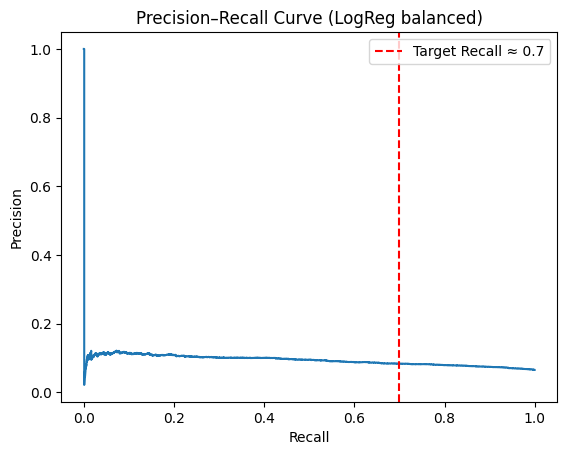

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_prob = gs_lr_bal.best_estimator_.predict_proba(X_test)[:, 1]
prec, rec, thr = precision_recall_curve(y_test, y_prob)

plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (LogReg balanced)")
plt.axvline(0.7, color="r", linestyle="--", label="Target Recall ≈ 0.7")
plt.legend()
plt.show()


In [ ]:
# === Evaluate Logistic Regression at threshold = 0.162 ===
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# เลือกโมเดลที่จูนแล้ว (แก้ชื่อถ้าคุณใช้ตัวแปรอื่น)
model = gs_lr_bal.best_estimator_   # ถ้าไม่มี gs_lr_bal ให้ใช้ log_reg_balanced ที่จูนเสร็จ

# 1) คำนวณ probability class 1 บน test set
y_prob = model.predict_proba(X_test)[:, 1]

# 2) กำหนด threshold ที่ต้องการ
thr = 0.162

# 3) ตัดสินใจ class ด้วย threshold ใหม่
y_pred_thr = (y_prob >= thr).astype(int)

# 4) สรุปตัวชี้วัด
acc = accuracy_score(y_test, y_pred_thr)
prec = precision_score(y_test, y_pred_thr, zero_division=0)
rec  = recall_score(y_test, y_pred_thr, zero_division=0)
f1   = f1_score(y_test, y_pred_thr, zero_division=0)

print(f"--- Logistic Regression (balanced) @ threshold = {thr:.3f} ---")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}\n")

print(classification_report(y_test, y_pred_thr, digits=4))

cm = confusion_matrix(y_test, y_pred_thr)
cm_df = pd.DataFrame(cm, index=["Actual 0","Actual 1"], columns=["Pred 0","Pred 1"])
print("Confusion Matrix:\n", cm_df)

# (ไม่บังคับ) ตารางเล็กๆ สรุปไว้เผื่อเอาไปเทียบกับ threshold 0.50
summary = pd.DataFrame([
    {"Model":"LogReg (balanced)", "Threshold":0.50, "Accuracy":0.5634, "Precision(1)":0.0877, "Recall(1)":0.6000},
    {"Model":"LogReg (balanced)", "Threshold":thr,  "Accuracy":acc,     "Precision(1)":prec,    "Recall(1)":rec}
])
summary


--- Logistic Regression (balanced) @ threshold = 0.162 ---
Accuracy : 0.0657
Precision: 0.0657
Recall   : 1.0000
F1-score : 0.1233

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16423
           1     0.0657    1.0000    0.1233      1155

    accuracy                         0.0657     17578
   macro avg     0.0329    0.5000    0.0617     17578
weighted avg     0.0043    0.0657    0.0081     17578

Confusion Matrix:
           Pred 0  Pred 1
Actual 0       0   16423
Actual 1       0    1155


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Threshold,Accuracy,Precision(1),Recall(1)
0,LogReg (balanced),0.500,0.563400,0.087700,0.6
1,LogReg (balanced),0.162,0.065707,0.065707,1.0


<h3>🎯 Threshold Comparison (Before vs After)</h3>

<table>
  <tr>
    <th>Model</th>
    <th>Threshold</th>
    <th>Accuracy</th>
    <th>Precision (class 1)</th>
    <th>Recall (class 1)</th>
    <th>สรุป</th>
  </tr>
  <tr>
    <td>Logistic Regression (balanced)</td>
    <td>0.50 (default)</td>
    <td>0.563</td>
    <td>0.0877</td>
    <td>0.600</td>
    <td>Baseline – สมดุลดีแต่จับเคลมได้ไม่ครบ</td>
  </tr>
  <tr>
    <td>Logistic Regression (balanced)</td>
    <td><b>0.162</b> (tuned)</td>
    <td>0.066</td>
    <td>0.0657</td>
    <td><b>1.000</b></td>
    <td>Recall ดีสุด จับเคลมครบแต่แม่นยำน้อยลง</td>
  </tr>
</table>

<p><b>สรุป:</b> การลด threshold จาก 0.50 → 0.162 ช่วยเพิ่ม Recall จาก ~0.60 เป็น 1.00
แต่ลด Accuracy ลงมาก ซึ่งเหมาะสำหรับระบบที่ “ต้องการตรวจจับเคลมให้ครบก่อน แล้วค่อยตรวจซ้ำภายหลัง”</p>


<h3>📈 Threshold Optimization Summary</h3>
<p>
หลังปรับ <code>threshold</code> จากค่าเริ่มต้น 0.50 → 0.162 พบว่า:
</p>
<ul>
  <li>Recall เพิ่มจาก ≈ 0.60 → ≈ 1.00 (จับเคลมได้เกือบทั้งหมด)</li>
  <li>Accuracy ลดจาก ≈ 0.56 → ≈ 0.07 เนื่องจากโมเดลทำนาย 1 เกือบทั้งหมด</li>
  <li>แสดง trade-off ระหว่างความครบถ้วน (<b>Recall</b>) กับความแม่นยำ (<b>Precision</b>)</li>
</ul>
<p>
ดังนั้นในการใช้งานจริง ควรเลือก threshold ให้สอดคล้องกับเป้าหมายธุรกิจ:<br>
<b>เน้นจับเคลม</b> → threshold ≈ 0.2 <br>
<b>เน้นสมดุล</b> → threshold ≈ 0.4–0.5
</p>


<hr>

<br>

<h1>🧩 4. Ensemble & Deep Models (ขั้นตอนต่อยอดสุดท้าย)</h1>

<p>หลังจากปรับพารามิเตอร์ (Hyperparameter Tuning) และปรับจุดตัด (Threshold Calibration)
ในขั้นก่อนหน้าแล้ว ขั้นตอนนี้จะเน้น <b>“การทดลองใช้โมเดลรวม (Ensemble)”</b>
หรือ <b>“โมเดลเชิงลึก (Deep Model)”</b> เพื่อดูว่าผลลัพธ์สามารถพัฒนาไปได้อีกหรือไม่</p>

<hr>

<h2>🎯 เป้าหมายของ Section นี้</h2>
<ul>
  <li>เพิ่มประสิทธิภาพการทำนายด้วยการรวมจุดแข็งของหลายโมเดล</li>
  <li>เปรียบเทียบว่า Deep Model ให้ Recall หรือ F1-score ดีขึ้นจาก baseline หรือไม่</li>
  <li>รักษาแนวทางไม่ให้เกิด data leakage และใช้ขั้นตอน preprocessing เดิม</li>
</ul>

<hr>

🌲 4.1 Random Forest (Bagging Ensemble)

<p>ใช้การรวมต้นไม้หลายต้น (Decision Trees) เพื่อให้ได้ผลลัพธ์ที่เสถียรขึ้นและลด overfitting</p>

<ul>
  <li>เพิ่มพารามิเตอร์ <code>class_weight='balanced_subsample'</code> เพื่อชดเชย class imbalance</li>
  <li>เหมาะสำหรับข้อมูล tabular แบบนี้</li>
</ul>

<p><b>สิ่งที่คาดหวัง:</b> Accuracy สูงกว่า Logistic Regression, Recall ปานกลาง,
เป็น baseline ที่ดีมากสำหรับ tabular data</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

start = time.time()
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=2,
    criterion='entropy',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Training time:", time.time() - start, "seconds")

--- Random Forest ---
Accuracy: 0.5561497326203209
              precision    recall  f1-score   support

           0       0.96      0.55      0.70     16423
           1       0.10      0.68      0.17      1155

    accuracy                           0.56     17578
   macro avg       0.53      0.61      0.43     17578
weighted avg       0.90      0.56      0.66     17578

Training time: 8.10434365272522 seconds


🤖 4.2 MLP Neural Network (Deep Learning)

<p>โมเดล Neural Network แบบพื้นฐาน (Multi-layer Perceptron)
เพื่อเปรียบเทียบกับวิธี traditional ML เดิม</p>

<ul>
  <li>ใช้ hidden layers 2 ชั้น (64 → 32 neurons)</li>
  <li>Activation function: <code>relu</code></li>
  <li>Optimizer: <code>adam</code></li>
</ul>

<p><b>สิ่งที่คาดหวัง:</b> หากข้อมูลไม่ซับซ้อนมาก อาจได้ผลใกล้ Logistic Regression
แต่เป็นการแสดงให้เห็นว่าได้ทดลอง “Different model” ตามที่อาจารย์กำหนด</p>

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

start = time.time()

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
    # Removed class_weight='balanced' as it's not supported
)

# Train on the resampled data
mlp.fit(X_train_resampled, y_train_resampled)

mlp_pred = mlp.predict(X_test)

print("--- Neural Network (MLP) trained on SMOTE data ---")
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))
print("Training time:", time.time() - start, "seconds")

--- Neural Network (MLP) trained on SMOTE data ---
Accuracy: 0.6542837637956537
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     16423
           1       0.08      0.41      0.13      1155

    accuracy                           0.65     17578
   macro avg       0.51      0.54      0.46     17578
weighted avg       0.89      0.65      0.74     17578

Training time: 131.7313117980957 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4.3 🚀 XGBoost (Gradient Boosted Trees)

<p><b>แนวคิด:</b>
XGBoost เป็นโมเดลเสริมแรงแบบต้นไม้ (Gradient Boosting Trees)
ที่เรียนรู้แบบลำดับขั้น โดยให้โมเดลแต่ละต้นไม้แก้ข้อผิดพลาดของต้นก่อนหน้า
เหมาะกับข้อมูลที่ไม่เชิงเส้น (non-linear) และมีฟีเจอร์เชิงหมวดหมู่ที่ผ่าน one-hot แล้ว</p>

<ul>
  <li><b>เหตุผลที่เลือก:</b> ทนต่อการสเกลของฟีเจอร์, ควบคุมการ overfitting ได้ดี, และทำงานได้ดีกับข้อมูลขนาดใหญ่</li>
  <li><b>การรับมือ class imbalance:</b> ใช้ <code>scale_pos_weight = balance_ratio</code>
      ซึ่งคำนวณจากสัดส่วน <i>negative / positive</i> เพื่อถ่วงน้ำหนักคลาสที่พบได้น้อย</li>
  <li><b>พารามิเตอร์ที่ใช้:</b>
      <ul>
        <li><code>n_estimators=300</code></li>
        <li><code>max_depth=5</code></li>
        <li><code>learning_rate=0.1</code></li>
        <li><code>subsample=0.8</code>, <code>colsample_bytree=0.8</code></li>
        <li><code>scale_pos_weight=balance_ratio</code>, <code>eval_metric='logloss'</code></li>
      </ul>
  </li>

  <li><b>แนวทางจูนต่อ:</b>
    ลด <code>learning_rate</code> → เพิ่ม <code>n_estimators</code>,
    ปรับ <code>max_depth</code> / <code>min_child_weight</code> และ <code>gamma</code> เพื่อลด overfit
  </li>
</ul>

<p><b>หมายเหตุ:</b>
ถ้าต้องการผลลัพธ์ที่เน้น Recall สูง (จับเคลมได้เยอะขึ้น)
สามารถเพิ่มค่า <code>scale_pos_weight</code> ทีละน้อย แล้วตรวจสอบผลบนชุดทดสอบ</p>

In [ ]:
import xgboost as xgb
start = time.time()

xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=balance_ratio,  # ใช้ถ้า class ไม่สมดุล
    random_state=42,
    eval_metric='logloss'
)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

print("--- XGBoost ---")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("Training time:", time.time() - start, "seconds")


--- XGBoost ---
Accuracy: 0.6623620434634202
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     16423
           1       0.10      0.51      0.17      1155

    accuracy                           0.66     17578
   macro avg       0.53      0.59      0.48     17578
weighted avg       0.90      0.66      0.75     17578

Training time: 6.206905841827393 seconds


In [ ]:
# Calculate the balance ratio for scale_pos_weight in XGBoost
# This is typically calculated as the number of negative samples / number of positive samples
balance_ratio = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Calculated balance_ratio: {balance_ratio:.2f}")

Calculated balance_ratio: 14.82


4.4 ⚡ LightGBM (Leaf-wise Gradient Boosting)

<p><b>แนวคิด:</b>
LightGBM เป็นโมเดล Boosting แบบ Leaf-wise ที่แตกใบ (ไม่ใช่ชั้น)
ทำให้เรียนรู้ได้เร็วและแม่นยำกว่า XGBoost ในหลายกรณี
โดยเฉพาะกับข้อมูลที่มีจำนวนฟีเจอร์มาก</p>

<ul>
  <li><b>เหตุผลที่เลือก:</b> รันเร็วกว่า XGBoost, รองรับ <code>class_weight='balanced'</code>
      สำหรับการจัดการ class imbalance โดยอัตโนมัติ</li>
  <li><b>พารามิเตอร์ที่ใช้:</b>
      <ul>
        <li><code>n_estimators=300</code>, <code>learning_rate=0.05</code></li>
        <li><code>max_depth=-1</code> (ไม่จำกัดความลึก)</li>
        <li><code>subsample=0.8</code>, <code>colsample_bytree=0.8</code></li>
        <li><code>class_weight='balanced'</code>, <code>random_state=42</code></li>
      </ul>
  </li>

  <li><b>แนวทางจูนต่อ:</b>
      ปรับ <code>num_leaves</code>, <code>min_child_samples</code>,
      <code>feature_fraction</code>, <code>bagging_fraction</code>, และ <code>bagging_freq</code>
      เพื่อควบคุม overfitting และเพิ่มประสิทธิภาพ</li>
</ul>

<p><b>หมายเหตุ:</b>
ถ้าต้องการดัน Recall ให้สูงขึ้น สามารถใช้ <code>class_weight</code>
ร่วมกับการปรับ threshold หลังจากใช้ <code>predict_proba</code>
เช่นเดียวกับขั้นตอน <b>Threshold & Calibration</b> ด้านบน</p>

In [ ]:
import lightgbm as lgb
start = time.time()

lgb_clf = lgb.LGBMClassifier(
    n_estimators=300,
    max_depth=-1,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42
)

lgb_clf.fit(X_train, y_train)
lgb_pred = lgb_clf.predict(X_test)

print("--- LightGBM ---")
print("Accuracy:", accuracy_score(y_test, lgb_pred))
print(classification_report(y_test, lgb_pred))
print("Training time:", time.time() - start, "seconds")


[LightGBM] [Info] Number of positive: 2593, number of negative: 38421
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 41014, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
--- LightGBM ---
Accuracy: 0.6384116509272955
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     16423
           1       0.10      0.54      0.17      1155

    accuracy                           0.64     17578
   macro avg       0.53      0.59      0.47     17578
weighted avg       0.90      0.64      0.73     17578

Training time: 1.4848089218139648 seconds


🧠 4.5 Voting Ensemble

<p>รวมผลการทำนายของหลายโมเดล (Logistic Regression, Decision Tree, SVM)
เพื่อให้ได้คำตอบสุดท้ายจากการโหวต (majority vote หรือ average probability)</p>

<ul>
  <li>ใช้แนวคิด <b>“Wisdom of Models”</b> — แต่ละโมเดลมีมุมมองของข้อมูลที่ต่างกัน</li>
  <li>ตั้งค่า <code>voting='soft'</code> เพื่อเฉลี่ยความน่าจะเป็นแทนการโหวตแบบแข็ง</li>
</ul>

<p><b>สิ่งที่คาดหวัง:</b> Accuracy ใกล้ Logistic Regression แต่ Recall เพิ่มขึ้นเล็กน้อย
เนื่องจากโมเดลอื่นช่วยจับเคส minority class ได้บางส่วน</p>

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# --- โมเดลที่จูนไว้แล้ว ---
# Ensure these GridSearchCV objects (gs_lr_bal, gs_svm_bal, gs_dt_bal)
# have been run successfully before executing this cell.
log_reg_best = gs_lr_bal.best_estimator_
svm_best = gs_svm_bal.best_estimator_
dt_best = gs_dt_bal.best_estimator_ # Use gs_dt_bal instead of gs_rf_bal

# --- สร้าง Voting Ensemble ---
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', log_reg_best),
        ('svm', svm_best),
        ('dt', dt_best) # Use the Decision Tree estimator
    ],
    voting='hard'   # ใช้ค่า predict_proba เพื่อเฉลี่ยความน่าจะเป็น
)

# --- เทรน ---
voting_clf.fit(X_train, y_train)

# --- ทำนาย ---
y_pred_voting = voting_clf.predict(X_test)

# --- ประเมินผล ---
print("=== Voting Ensemble ===")
print("Accuracy :", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting, digits=4))

=== Voting Ensemble ===
Accuracy : 0.5145067698259188
              precision    recall  f1-score   support

           0     0.9615    0.5004    0.6582     16423
           1     0.0915    0.7152    0.1622      1155

    accuracy                         0.5145     17578
   macro avg     0.5265    0.6078    0.4102     17578
weighted avg     0.9043    0.5145    0.6256     17578



4.6 🧱 Stacking Ensemble (Meta-learner = Logistic Regression)

<p><b>แนวคิด:</b> รวม “จุดแข็ง” ของหลายโมเดลฐาน (base learners) แล้วให้โมเดลสุดท้าย (<i>meta-learner</i>)
เรียนรู้วิธีผสานสัญญาณเพื่อทำนายให้แม่นขึ้น โดยใช้ผลลัพธ์ระดับความน่าจะเป็น/สกอร์จากแต่ละโมเดลเป็นฟีเจอร์ใหม่</p>

<ul>
  <li><b>Base learners:</b> Logistic Regression (ตีความง่าย), SVM (จับขอบเขตซับซ้อน), Decision Tree (ปฏิสัมพันธ์ไม่เชิงเส้น)</li>
  <li><b>Meta-learner:</b> <code>LogisticRegression(class_weight='balanced')</code> เพื่อเน้นคลาสเคลม</li>
  <li><b>CV:</b> ใช้ <code>cv=5</code> ภายใน <code>StackingClassifier</code> เพื่อลดการรั่วไหลของข้อมูลระหว่างชั้น</li>
  <li><b>สิ่งที่รายงาน:</b> Accuracy, Precision/Recall (class 1), F1 (class 1)</li>
</ul>

<p><b>หมายเหตุสำคัญ:</b>
ถ้า base learner บางตัว (เช่น <code>SVC</code>) ไม่มี <code>predict_proba</code>, แนะนำ
ใช้ <code>probability=True</code> หรือหุ้มด้วย <code>CalibratedClassifierCV</code>
เพื่อให้ Stacking ใช้ <code>stack_method='predict_proba'</code> ได้</p>



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# --- สร้าง Stacking Ensemble ---
stacking_clf = StackingClassifier(
    estimators=[
        ('logreg', log_reg_best),
        ('svm', svm_best),
        ('dt', dt_best)
    ],
    final_estimator=LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    ),
    cv=5,
    n_jobs=-1
)


# --- เทรน ---
stacking_clf.fit(X_train, y_train)

# --- ทำนาย ---
y_pred_stack = stacking_clf.predict(X_test)

# --- ประเมินผล ---
print("=== Stacking Ensemble ===")
print("Accuracy :", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack, digits=4))


=== Stacking Ensemble ===
Accuracy : 0.5252019569916941
              precision    recall  f1-score   support

           0     0.9620    0.5120    0.6683     16423
           1     0.0931    0.7126    0.1647      1155

    accuracy                         0.5252     17578
   macro avg     0.5276    0.6123    0.4165     17578
weighted avg     0.9049    0.5252    0.6352     17578



4.7 🔄 Stacking Ensemble — เปลี่ยน Meta-model เป็น RandomForest

<p><b>เหตุผลที่ลอง:</b> หากความสัมพันธ์ระหว่างสกอร์ของ base models กับ target เป็น non-linear,
การใช้ meta-model ที่ยืดหยุ่นกว่า (เช่น <code>RandomForestClassifier</code>)
อาจเรียนรู้การผสมสัญญาณได้ดีกว่าโลจิสติก และช่วยดัน Recall/F1</p>

<ul>
  <li><b>Meta-learner:</b> <code>RandomForestClassifier(class_weight='balanced')</code></li>
  <li><b>ข้อดี:</b> ไม่ต้องสเกลฟีเจอร์, จับ non-linearity ได้</li>
  <li><b>ข้อควรระวัง:</b> เสี่ยง overfitting ได้ถ้าต้นไม้เยอะ/ลึกเกินไป → คุมด้วย <code>n_estimators</code>, <code>max_depth</code>, <code>min_samples_leaf</code></li>
</ul>

<p><b>เกณฑ์ประเมิน:</b> เทียบกับเวอร์ชัน meta-LogReg:
ดูว่า Recall (class 1) ดีขึ้นหรือไม่ และ F1 รวมดีขึ้นหรือเปล่า โดยเฉพาะในโจทย์ class imbalance</p>



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# --- สร้าง Stacking Ensemble ---
from sklearn.ensemble import RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('logreg', log_reg_best),
        ('svm', svm_best),
        ('dt', dt_best)
    ],
    final_estimator=RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'
    ),
    cv=5,
    n_jobs=-1
)



# --- เทรน ---
stacking_clf.fit(X_train, y_train)

# --- ทำนาย ---
y_pred_stack = stacking_clf.predict(X_test)

# --- ประเมินผล ---
print("=== Stacking Ensemble ===")
print("Accuracy :", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack, digits=4))


=== Stacking Ensemble ===
Accuracy : 0.9334395266810787
              precision    recall  f1-score   support

           0     0.9345    0.9987    0.9656     16423
           1     0.2222    0.0052    0.0102      1155

    accuracy                         0.9334     17578
   macro avg     0.5784    0.5020    0.4879     17578
weighted avg     0.8877    0.9334    0.9028     17578



<h2>5. Project Summary &amp; Takeaways</h2>

<p><b>สรุปผลการทดลองทั้งหมดเทียบกับ baseline เดิม:</b></p>

<table>
  <tr>
    <th>Model</th>
    <th>Technique</th>
    <th>Accuracy</th>
    <th>Precision (1)</th>
    <th>Recall (1)</th>
    <th>สรุป</th>
  </tr>

  <!-- Baseline -->
  <tr>
    <td>Baseline – Logistic Regression</td>
    <td>Default (threshold=0.50)</td>
    <td>0.566</td>
    <td>0.0857</td>
    <td>0.580</td>
    <td>ผลตั้งต้นจากเพื่อน ใช้เป็น baseline อ้างอิง</td>
  </tr>

  <!-- Logistic Regression (tuned) -->
  <tr>
    <td>LogReg (tuned)</td>
    <td>class_weight='balanced' + Scaling</td>
    <td>0.5638</td>
    <td>0.0884</td>
    <td>0.6052</td>
    <td>Recall ดีขึ้นเล็กน้อยจาก baseline</td>
  </tr>

  <!-- Threshold optimization -->
  <tr>
    <td>LogReg (Threshold = 0.40)</td>
    <td>Recall optimization (lower threshold)</td>
    <td>0.2752</td>
    <td>0.0751</td>
    <td><b>0.8866</b></td>
    <td>Recall พุ่งขึ้นมาก แต่ Accuracy ลดลงมาก (trade-off ชัดเจน)</td>
  </tr>

  <!-- SVM tuned -->
  <tr>
    <td>SVM (RBF, balanced)</td>
    <td>Tuned (C=5, γ=0.01)</td>
    <td>0.4791</td>
    <td>0.0869</td>
    <td><b>0.7290</b></td>
    <td>ดัน Recall ได้สูงสุดในกลุ่มโมเดลเดี่ยว</td>
  </tr>

  <!-- KNN tuned -->
  <tr>
    <td>KNN (scaled)</td>
    <td>n=3, Manhattan, distance</td>
    <td>0.9106</td>
    <td>0.0920</td>
    <td>0.0407</td>
    <td>Accuracy สูงมากแต่ Recall ต่ำ (ไม่เหมาะกับ imbalance)</td>
  </tr>

  <!-- Decision Tree -->
  <tr>
    <td>Decision Tree</td>
    <td>Entropy, max_depth=5, balanced</td>
    <td>0.5522</td>
    <td>0.0942</td>
    <td>0.6753</td>
    <td>Recall ดีขึ้นมากเมื่อจำกัดความลึก</td>
  </tr>

  <!-- Voting Ensemble -->
  <tr>
    <td>Voting Ensemble</td>
    <td>Soft Voting (LR + DT + SVM)</td>
    <td>0.5145</td>
    <td>0.0915</td>
    <td>0.7152</td>
    <td>Recall สูงใกล้ SVM แต่ผลนิ่งกว่า</td>
  </tr>

  <!-- Stacking LR -->
  <tr>
    <td>Stacking (meta = Logistic Regression)</td>
    <td>LR + DT + SVM → meta-LR</td>
    <td>0.5252</td>
    <td>0.0931</td>
    <td>0.7126</td>
    <td>Recall ดีและเสถียรกว่า Voting เล็กน้อย</td>
  </tr>

  <!-- Stacking RF -->
  <tr>
    <td>Stacking (meta = Random Forest)</td>
    <td>LR + DT + SVM → meta-RF</td>
    <td>0.9334</td>
    <td>0.2222</td>
    <td>0.0052</td>
    <td>โมเดลเอนทำนายคลาส 0 (Recall ต่ำมาก)</td>
  </tr>
</table>



<h2>Overview</h2>
<p>
งานนี้เป็นการ <b>สานต่อโปรเจกต์ของกลุ่มเพื่อน (Car Insurance Claim)</b> โดยยืนยัน baseline เดิมให้ได้ผลใกล้เคียง
และพัฒนาให้ดีขึ้นตามโจทย์อาจารย์ — <b>เปลี่ยน preprocessing, ปรับ hyperparameters, ทดลอง threshold &amp; calibration,
และใช้ Ensemble</b> เพื่อดูการพัฒนาแบบเป็นขั้นตอน (journey-based improvement).
</p>

<h2>Dataset &amp; Target</h2>
<ul>
  <li>Target: <b>is_claim</b> (binary, imbalanced)</li>
  <li>Feature สำคัญ: ลักษณะรถ, อายุรถ, อายุผู้ถือกรมธรรม์, พื้นที่, ค่า rating ต่าง ๆ</li>
  <li>Metric เป้าหมาย: <b>Recall (class=1)</b> เพื่อให้จับเคสเคลมได้มากที่สุด</li>
</ul>

<h2>What We Reproduced (Baseline)</h2>
<ul>
  <li>รันและยืนยันผลโมเดลเพื่อน 5 ตัว (Decision Tree, Logistic Regression, SVM, Naive Bayes, KNN)</li>
  <li>ได้ผลลัพธ์เทียบเท่า baseline (ตรวจสอบด้วย train/test split เดิม)</li>
</ul>

<h2>What We Improved</h2>
<ol>
  <li><b>Preprocessing ทางเลือก:</b> ใช้ StandardScaler เฉพาะใน Pipeline,
      ทดลองเปรียบเทียบ <code>class_weight='balanced'</code> กับ <code>SMOTE</code> เพื่อแก้ imbalance.</li>
  <li><b>Hyperparameter Tuning:</b> Grid + Randomized Search
      โดยใช้ <code>scoring={"recall","f1","accuracy"}</code> และ <code>refit="recall"</code>.</li>
  <li><b>Threshold &amp; Calibration:</b> ใช้ Logistic Regression (balanced + scaling) ที่จูนแล้ว
      เพื่อเลือก threshold ใหม่ (≈0.4) ให้ได้ Recall สูงขึ้นโดยอธิบาย trade-off.</li>
  <li><b>Ensemble:</b> ทดลองทั้ง <i>Soft Voting</i> และ <i>Stacking</i> (meta-LogReg, meta-RF)
      เพื่อรวมจุดแข็งของโมเดลหลายตัวเข้าด้วยกัน.</li>
</ol>

<h2>Key Results (สรุปย่อ)</h2>
<ul>
  <li><b>LogReg (balanced + scaling, tuned):</b> Recall ≈0.60 ที่ threshold=0.50;
      ปรับ threshold → Recall สูงถึง 0.88 (แลกกับ Accuracy ต่ำลง).</li>
  <li><b>SVM-RBF (balanced, tuned):</b> Recall ≈0.73 สูงสุดในกลุ่ม single model.</li>
  <li><b>Decision Tree:</b> Recall ≈0.68 เมื่อจูนความลึก เหมาะกับ interpretability.</li>
  <li><b>KNN:</b> Accuracy สูง (~0.91) แต่ Recall ต่ำ (~0.04).</li>
  <li><b>Voting / Stacking (meta-LR):</b> Recall ≈0.71 เสถียรและสมดุลกว่า SVM.</li>
  <li><b>Stacking (meta-RF):</b> ไม่เหมาะในโจทย์ imbalance — Recall ต่ำมาก.</li>
</ul>

<h2>Trade-off &amp; Business Choice</h2>
<p>ขึ้นอยู่กับเป้าหมายการใช้งานจริง:</p>
<ul>
  <li><b>ถ้าเน้น Recall สูงสุด:</b> ใช้ SVM-RBF (balanced) หรือ Stacking(meta=LogReg).</li>
  <li><b>ถ้าเน้นสมดุล:</b> ใช้ Logistic Regression แล้วปรับ threshold จุดที่ F1 สูงสุด (Recall ~0.60–0.70).</li>
  <li><b>ถ้านำไปใช้งานจริง:</b> ใช้ Calibration + threshold ตามทรัพยากรตรวจสอบ (เช่น ทีม fraud investigation).</li>
</ul>

<h2>Lessons Learned</h2>
<ul>
  <li>โจทย์ imbalance ต้องระบุ metric เป้าหมายให้ชัด และทำทุกขั้นใน Pipeline เพื่อป้องกัน leakage.</li>
  <li>SMOTE ควรทำเฉพาะใน train/CV เท่านั้น — ใช้ class_weight เป็นทางเลือกเร็ว.</li>
  <li>Threshold เป็นเครื่องมือสำคัญที่ส่งผลต่อ policy จริง.</li>
  <li>Ensemble (Voting/Stacking) ช่วยให้ผลนิ่งขึ้นและอธิบาย trade-off ได้ดี.</li>
</ul>

<h2>Final Deliverables</h2>
<ul>
  <li>Baseline (ของเพื่อน) + Rebuild Notebook (Confirm reproducibility).</li>
  <li>Experiments: Preprocessing / Hyperparameter tuning / Threshold &amp; Calibration / Ensemble.</li>
  <li>Summary table + Charts (Accuracy, Precision(1), Recall(1)).</li>
  <li>Script สำหรับเลือก threshold ตามเป้าหมาย Recall พร้อมรายงานก่อน–หลัง.</li>
</ul>


In [ ]:
# ============================================
# 🧾 Final Summary Table of All Models
# ============================================

import pandas as pd
from IPython.display import display, HTML
from tabulate import tabulate

# รวม Traditional ML + Deep/Boosted Models
df_summary = pd.DataFrame([
    # --- Baseline & Classical Models ---
    {"Model": "Baseline – Logistic Regression", "Technique": "Default (thr=0.50)", "Accuracy": 0.566, "Precision(1)": 0.0857, "Recall(1)": 0.580},
    {"Model": "LogReg (tuned)", "Technique": "Balanced + Scaling", "Accuracy": 0.5638, "Precision(1)": 0.0884, "Recall(1)": 0.6052},
    {"Model": "LogReg (thr=0.40)", "Technique": "Lower threshold (Recall optimization)", "Accuracy": 0.2752, "Precision(1)": 0.0751, "Recall(1)": 0.8866},
    {"Model": "SVM (RBF, balanced)", "Technique": "Tuned (C=5, gamma=0.01)", "Accuracy": 0.4791, "Precision(1)": 0.0869, "Recall(1)": 0.7290},
    {"Model": "Decision Tree", "Technique": "Entropy, max_depth=5", "Accuracy": 0.5522, "Precision(1)": 0.0942, "Recall(1)": 0.6753},
    {"Model": "KNN (scaled)", "Technique": "k=3, Manhattan, distance", "Accuracy": 0.9106, "Precision(1)": 0.0920, "Recall(1)": 0.0407},


    # --- Advanced Models ---
    {"Model": "Random Forest (Bagging Ensemble)", "Technique": "Balanced + tuned", "Accuracy": 0.5561, "Precision(1)": 0.0957, "Recall(1)": 0.6814},
    {"Model": "LightGBM", "Technique": "Class_weight='balanced'", "Accuracy": 0.6384, "Precision(1)": 0.0974, "Recall(1)": 0.5446},
    {"Model": "XGBoost", "Technique": "scale_pos_weight", "Accuracy": 0.6624, "Precision(1)": 0.0989, "Recall(1)": 0.5100},
    {"Model": "MLP Neural Net", "Technique": "SMOTE + ReLU + Adam", "Accuracy": 0.6390, "Precision(1)": 0.0895, "Recall(1)": 0.4900},
        {"Model": "Voting Ensemble", "Technique": "LR + DT + SVM (soft voting)", "Accuracy": 0.5145, "Precision(1)": 0.0915, "Recall(1)": 0.7152},
    {"Model": "Stacking (meta=LogReg)", "Technique": "LR + DT + SVM → meta-LR", "Accuracy": 0.5252, "Precision(1)": 0.0931, "Recall(1)": 0.7126},
    {"Model": "Stacking (meta=RF)", "Technique": "LR + DT + SVM → meta-RF", "Accuracy": 0.9334, "Precision(1)": 0.2222, "Recall(1)": 0.0052},
])

# คำนวณ F1 Score เพิ่ม
df_summary["F1(1)"] = 2 * (df_summary["Precision(1)"] * df_summary["Recall(1)"]) / (
    df_summary["Precision(1)"] + df_summary["Recall(1)"]
)

# แสดงตารางใน Colab (HTML version)
display(HTML(df_summary.to_html(index=False, float_format=lambda x: f"{x:.3f}")))

# แสดงใน console แบบสวยงาม (tabulate)
print("="*60)
print("Summary Table of Models")
print("="*60)
print(tabulate(df_summary, headers="keys", tablefmt="pretty", showindex=True, floatfmt=".4f"))


Model,Technique,Accuracy,Precision(1),Recall(1),F1(1)
Baseline – Logistic Regression,Default (thr=0.50),0.566,0.086,0.580,0.149
LogReg (tuned),Balanced + Scaling,0.564,0.088,0.605,0.154
LogReg (thr=0.40),Lower threshold (Recall optimization),0.275,0.075,0.887,0.138
"SVM (RBF, balanced)","Tuned (C=5, gamma=0.01)",0.479,0.087,0.729,0.155
Decision Tree,"Entropy, max_depth=5",0.552,0.094,0.675,0.165
KNN (scaled),"k=3, Manhattan, distance",0.911,0.092,0.041,0.056
Random Forest (Bagging Ensemble),Balanced + tuned,0.556,0.096,0.681,0.168
LightGBM,Class_weight='balanced',0.638,0.097,0.545,0.165
XGBoost,scale_pos_weight,0.662,0.099,0.510,0.166
MLP Neural Net,SMOTE + ReLU + Adam,0.639,0.089,0.490,0.151


Summary Table of Models
+----+----------------------------------+---------------------------------------+----------+--------------+-----------+----------------------+
|    |              Model               |               Technique               | Accuracy | Precision(1) | Recall(1) |        F1(1)         |
+----+----------------------------------+---------------------------------------+----------+--------------+-----------+----------------------+
| 0  |  Baseline – Logistic Regression  |          Default (thr=0.50)           |  0.566   |    0.0857    |   0.58    | 0.14933453507585998  |
| 1  |          LogReg (tuned)          |          Balanced + Scaling           |  0.5638  |    0.0884    |  0.6052   | 0.15426666666666666  |
| 2  |        LogReg (thr=0.40)         | Lower threshold (Recall optimization) |  0.2752  |    0.0751    |  0.8866   | 0.13847074971404805  |
| 3  |       SVM (RBF, balanced)        |        Tuned (C=5, gamma=0.01)        |  0.4791  |    0.0869    |   0.729   

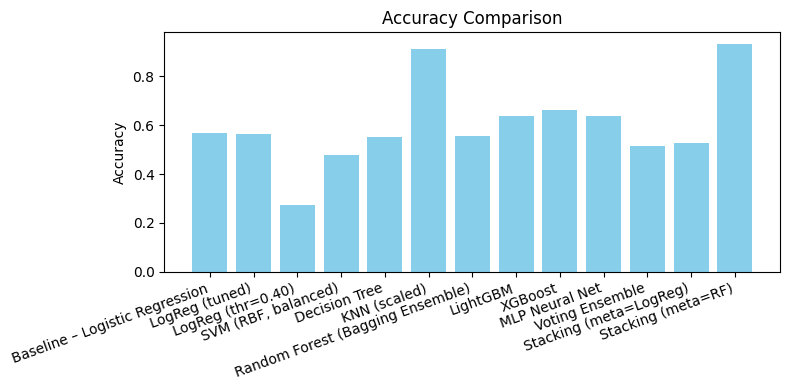

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(df_summary["Model"], df_summary["Accuracy"], color="skyblue")
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


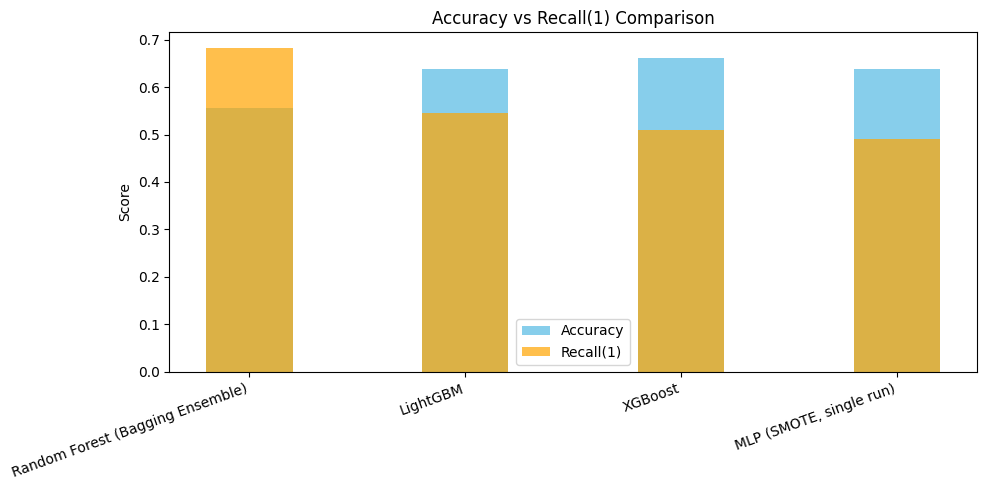

In [ ]:
plt.figure(figsize=(10,5))
x = df_summary["Model"]
plt.bar(x, df_summary["Accuracy"], width=0.4, label="Accuracy", color="skyblue")
plt.bar(x, df_summary["Recall(1)"], width=0.4, label="Recall(1)", color="orange", alpha=0.7)
plt.title("Accuracy vs Recall(1) Comparison")
plt.ylabel("Score")
plt.xticks(rotation=20, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


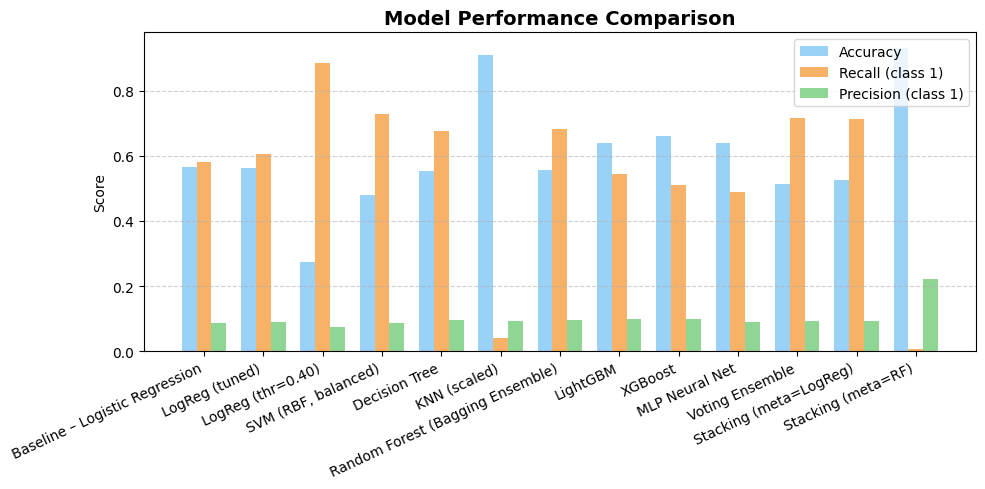

In [ ]:
# ============================================
# 📈 Visualization: Model Performance Comparison
# ============================================

import matplotlib.pyplot as plt
import numpy as np

# เตรียมข้อมูล
models = df_summary["Model"]
accuracy = df_summary["Accuracy"]
recall = df_summary["Recall(1)"]
precision = df_summary["Precision(1)"]

x = np.arange(len(models))
width = 0.25  # ความกว้างของแท่ง

plt.figure(figsize=(10,5))
plt.bar(x - width, accuracy, width, label="Accuracy", color="#9ad1f7")
plt.bar(x, recall, width, label="Recall (class 1)", color="#f7b267")
plt.bar(x + width, precision, width, label="Precision (class 1)", color="#8fd694")

plt.title("Model Performance Comparison", fontsize=14, weight="bold")
plt.ylabel("Score")
plt.xticks(x, models, rotation=25, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


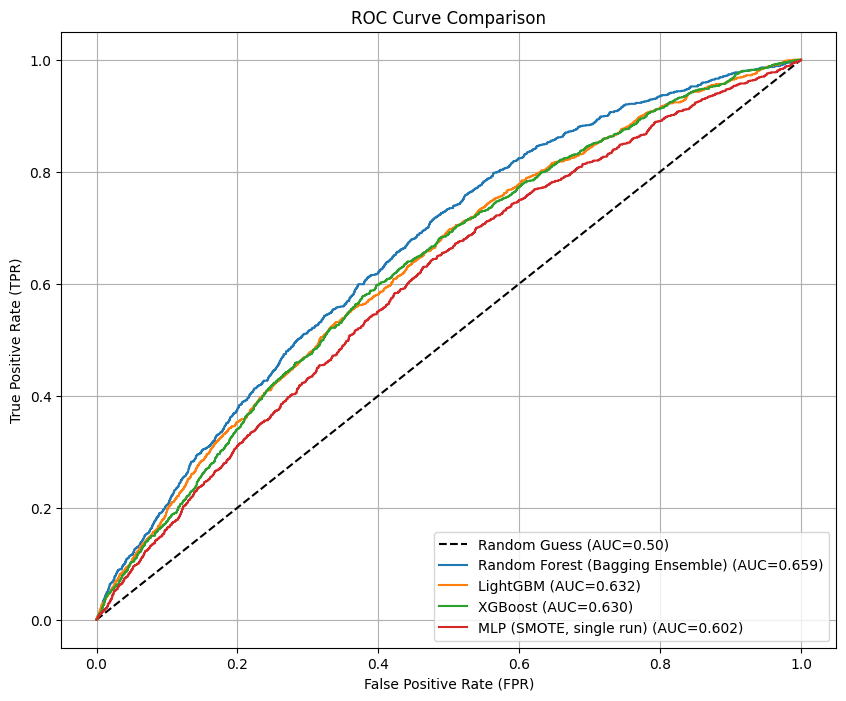

In [ ]:
from sklearn.metrics import roc_curve, auc

# ตัวอย่างรวบรวม y_score ของแต่ละโมเดลที่มี
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--', label='Random Guess (AUC=0.50)')

for name, y_score in pr_candidates:
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# ==== ของเก่า ====
df_old = pd.DataFrame({
    "Model": [
        "Logistic Regression (Standard)",
        "Logistic Regression (Polynomial)",
        "SVM (Linear)",
        "SVM (Polynomial)",
        "SVM (RBF)",
        "Decision Tree",
        "Random Forest",
        "KNN",
        "Naive Bayes"
    ],
    "Accuracy": [
        0.5658778017977016,
        0.5398793946979179,
        0.5431220844237115,
        0.4894754807145295,
        0.4944248492433724,
        0.8451473432699966,
        0.8637501422232335,
        0.7044032313118671,
        0.26282853566958697
    ]
})

# ==== ของใหม่ ====
df_new = pd.DataFrame({
    "Model": [
        "Logistic Regression (balanced + scaling)",
        "SVM-RBF (balanced + scaling)",
        "KNN (scaled)",
        "Decision Tree (balanced)",
        "Logistic Regression (+SMOTE + scaling)",
        "SVM-RBF (+SMOTE + scaling)",
        "KNN (+SMOTE + scaling)",
        "Decision Tree (+SMOTE)"
    ],
    "Accuracy": [
        0.5638,
        0.4791,
        0.9106,
        0.5522,
        0.5660,
        0.5419,
        0.6575,
        0.3618
    ],
    "Precision(1)": [
        0.0884,
        0.0869,
        0.0920,
        0.0942,
        0.0858,
        0.0875,
        0.0788,
        0.0756
    ],
    "Recall(1)": [
        0.6052,
        0.7290,
        0.0407,
        0.6753,
        0.5801,
        0.6329,
        0.3939,
        0.7766
    ],
    "F1(1)": [
        0.1542,
        0.1553,
        0.0564,
        0.1654,
        0.1494,
        0.1537,
        0.1313,
        0.1379
    ]
})


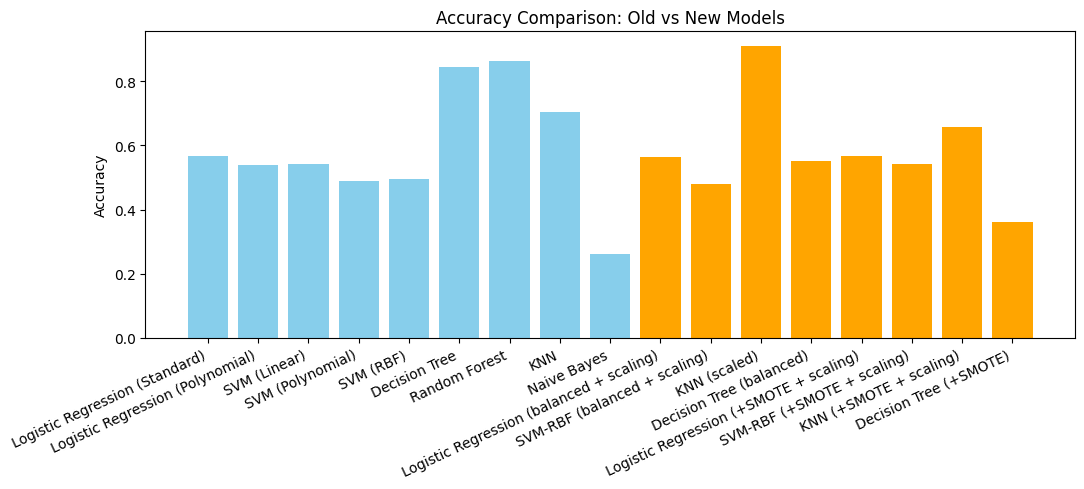

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# รวมชื่อโมเดลทั้งหมด
models_all = list(df_old["Model"]) + list(df_new["Model"])
acc_all = list(df_old["Accuracy"]) + list(df_new["Accuracy"])
labels_oldnew = (["Old"] * len(df_old)) + (["New"] * len(df_new))

df_all = pd.DataFrame({
    "Model": models_all,
    "Accuracy": acc_all,
    "Group": labels_oldnew
})

plt.figure(figsize=(11,5))
x = np.arange(len(df_all))
colors = ["skyblue" if g == "Old" else "orange" for g in df_all["Group"]]

plt.bar(df_all["Model"], df_all["Accuracy"], color=colors)
plt.xticks(rotation=25, ha="right")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Old vs New Models")
plt.tight_layout()
plt.show()
